#1-2번







# 1. 준비


In [153]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [154]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.pyplot.bar_label
import seaborn as sns;
import optuna
from scipy import stats
import glob
import random
import datetime

import os
import pickle
# from  datasist.structdata import detect_outliers
from tqdm import tqdm
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)
from datetime import date,timedelta

import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Pre Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
# Error Metrics
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


#classefication
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
#clustring
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#hyper parameter tunning
from sklearn.model_selection import GridSearchCV
#pca
from sklearn.decomposition import PCA

In [155]:
seed = 42
np.random.seed =seed

In [156]:
def lowerCase(x):
    return x.lower()

def check_duplicate(df):
    if df.duplicated().all():
        return  'duplication'
    else :
        return 'No Duplicate .'




In [157]:
!unzip application_record.csv.zip
!unzip credit_record.csv.zip

Archive:  application_record.csv.zip
replace application_record.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: application_record.csv  
Archive:  credit_record.csv.zip
replace credit_record.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: credit_record.csv       


In [158]:
app_df = pd.read_csv('application_record.csv')
app_df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                0           0           0  Security staff   
3                1                0           1           1     Sales staff   
4                1                0           1           1     Sales staff   
...            ...              ...         ...         ...             ...   
438552           1                0           0           0             NaN   
438553           1                0           0           0        Laborers   
438554           1                1           0           0     Sales staff   
438555           1                0           0           0             NaN   
438556           1                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  
0                   2.0  
1                   2.0  
2                   2.0  
3                   1.0  
4                   1.0  
...                 ...  
438552              1.0  
438553              1.0  
438554              1.0  
43855

In [159]:
app_df.shape

(438557, 18)

In [160]:
credit_df = pd.read_csv('credit_record.csv')
credit_df

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

In [161]:
credit_df.shape

(1048575, 3)

In [162]:
df = app_df.merge(credit_df, how='inner', on=['ID'])
df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008804           M            Y               Y             0   
2       5008804           M            Y               Y             0   
3       5008804           M            Y               Y             0   
4       5008804           M            Y               Y             0   
...         ...         ...          ...             ...           ...   
777710  5150337           M            N               Y             0   
777711  5150337           M            N               Y             0   
777712  5150337           M            N               Y             0   
777713  5150337           M            N               Y             0   
777714  5150337           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0          Working               Higher education   
1               427500.0          Working               Higher education   
2               427500.0          Working               Higher education   
3               427500.0          Working               Higher education   
4               427500.0          Working               Higher education   
...                  ...              ...                            ...   
777710          112500.0          Working  Secondary / secondary special   
777711          112500.0          Working  Secondary / secondary special   
777712          112500.0          Working  Secondary / secondary special   
777713          112500.0          Working  Secondary / secondary special   
777714          112500.0          Working  Secondary / secondary special   

          NAME_FAMILY_STATUS NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage  Rented apartment      -12005          -4542   
1             Civil marriage  Rented apartment      -12005          -4542   
2             Civil marriage  Rented apartment      -12005          -4542   
3             Civil marriage  Rented apartment      -12005          -4542   
4             Civil marriage  Rented apartment      -12005          -4542   
...                      ...               ...         ...            ...   
777710  Single / not married  Rented apartment       -9188          -1193   
777711  Single / not married  Rented apartment       -9188          -1193   
777712  Single / not married  Rented apartment       -9188          -1193   
777713  Single / not married  Rented apartment       -9188          -1193   
777714  Single / not married  Rented apartment       -9188          -1193   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                1           0           0             NaN   
3                1                1           0           0             NaN   
4                1                1           0           0             NaN   
...            ...              ...         ...         ...             ...   
777710           1                0           0           0        Laborers   
777711           1                0           0           0        Laborers   
777712           1                0           0           0        Laborers   
777713           1                0           0           0        Laborers   
777714           1                0           0           0        Laborers   

        CNT_FAM_MEMBERS  MONTHS_BALANCE STATUS  
0                   2.0               0      C  
1                   2.0              -1      C  
2                   2.0              -2      C  
3                   2.0              -3      C  
4                   2.0              -4      C  
...                 ...             ...    

# 2. 전처리

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [164]:
numCol  = [col for col in df.columns if  df[col].dtype != "O"]
numCol

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'MONTHS_BALANCE']

In [165]:
df.describe().T

count          mean            std        min        25%  \
ID                777715.0  5.078743e+06   41804.424817  5008804.0  5044568.5   
CNT_CHILDREN      777715.0  4.280823e-01       0.745755        0.0        0.0   
AMT_INCOME_TOTAL  777715.0  1.885348e+05  101622.450077    27000.0   121500.0   
DAYS_BIRTH        777715.0 -1.612494e+04    4104.304018   -25152.0   -19453.0   
DAYS_EMPLOYED     777715.0  5.777583e+04  136471.735391   -15713.0    -3292.0   
FLAG_MOBIL        777715.0  1.000000e+00       0.000000        1.0        1.0   
FLAG_WORK_PHONE   777715.0  2.318176e-01       0.421993        0.0        0.0   
FLAG_PHONE        777715.0  3.009650e-01       0.458678        0.0        0.0   
FLAG_EMAIL        777715.0  9.167497e-02       0.288567        0.0        0.0   
CNT_FAM_MEMBERS   777715.0  2.208837e+00       0.907380        1.0        2.0   
MONTHS_BALANCE    777715.0 -1.937356e+01      14.082208      -60.0      -29.0   

                        50%        75%        max  
ID                5069530.0  5115551.0  5150487.0  
CNT_CHILDREN            0.0        1.0       19.0  
AMT_INCOME_TOTAL   162000.0   225000.0  1575000.0  
DAYS_BIRTH         -15760.0   -12716.0    -7489.0  
DAYS_EMPLOYED       -1682.0     -431.0   365243.0  
FLAG_MOBIL              1.0        1.0        1.0  
FLAG_WORK_PHONE         0.0        0.0        1.0  
FLAG_PHONE              0.0        1.0        1.0  
FLAG_EMAIL              0.0        0.0        1.0  
CNT_FAM_MEMBERS         2.0        3.0       20.0  
MONTHS_BALANCE        -17.0       -8.0        0.0

In [166]:
df.shape

(777715, 20)

* **i dropped this column  because  when i make model for  data , i want model to not give it any weight to neglect its importance**

In [167]:
#중복 체크
check_duplicate(df)

'No Duplicate .'

In [168]:
# 결측치 체크
df.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE        240048
ID                          0
CODE_GENDER                 0
MONTHS_BALANCE              0
CNT_FAM_MEMBERS             0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_WORK_PHONE             0
FLAG_MOBIL                  0
DAYS_EMPLOYED               0
DAYS_BIRTH                  0
NAME_HOUSING_TYPE           0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
AMT_INCOME_TOTAL            0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
STATUS                      0
dtype: int64

<Axes: >

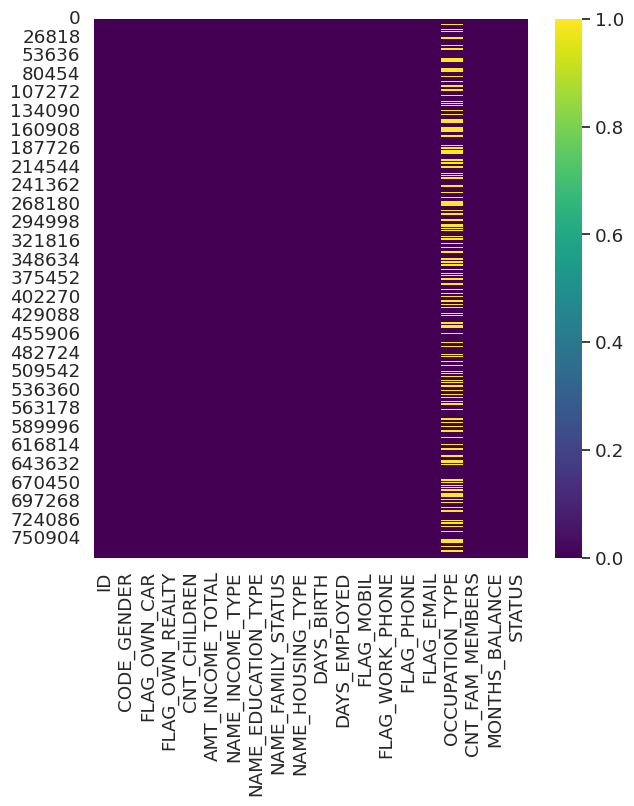

In [169]:
cols =df.columns
sns.heatmap(df[cols].isnull(), cmap='viridis')

In [170]:
# filling null data
df['OCCUPATION_TYPE'] =df['OCCUPATION_TYPE'].replace(np.nan,'others')   #결측치는 others로 치환

<Axes: >

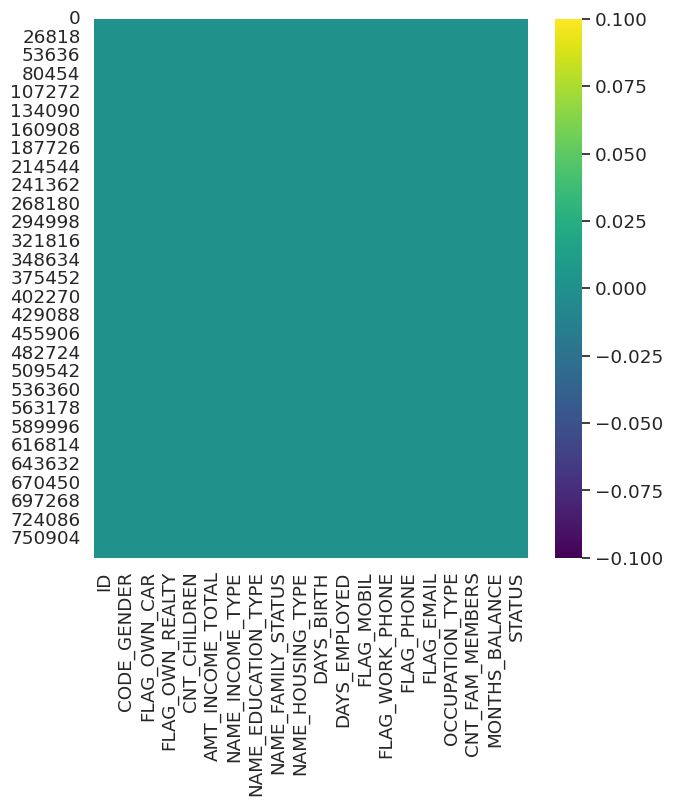

In [171]:
cols =df.columns
sns.heatmap(df[cols].isnull(), cmap='viridis')

In [172]:
df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008804           M            Y               Y             0   
2       5008804           M            Y               Y             0   
3       5008804           M            Y               Y             0   
4       5008804           M            Y               Y             0   
...         ...         ...          ...             ...           ...   
777710  5150337           M            N               Y             0   
777711  5150337           M            N               Y             0   
777712  5150337           M            N               Y             0   
777713  5150337           M            N               Y             0   
777714  5150337           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0          Working               Higher education   
1               427500.0          Working               Higher education   
2               427500.0          Working               Higher education   
3               427500.0          Working               Higher education   
4               427500.0          Working               Higher education   
...                  ...              ...                            ...   
777710          112500.0          Working  Secondary / secondary special   
777711          112500.0          Working  Secondary / secondary special   
777712          112500.0          Working  Secondary / secondary special   
777713          112500.0          Working  Secondary / secondary special   
777714          112500.0          Working  Secondary / secondary special   

          NAME_FAMILY_STATUS NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage  Rented apartment      -12005          -4542   
1             Civil marriage  Rented apartment      -12005          -4542   
2             Civil marriage  Rented apartment      -12005          -4542   
3             Civil marriage  Rented apartment      -12005          -4542   
4             Civil marriage  Rented apartment      -12005          -4542   
...                      ...               ...         ...            ...   
777710  Single / not married  Rented apartment       -9188          -1193   
777711  Single / not married  Rented apartment       -9188          -1193   
777712  Single / not married  Rented apartment       -9188          -1193   
777713  Single / not married  Rented apartment       -9188          -1193   
777714  Single / not married  Rented apartment       -9188          -1193   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0          others   
1                1                1           0           0          others   
2                1                1           0           0          others   
3                1                1           0           0          others   
4                1                1           0           0          others   
...            ...              ...         ...         ...             ...   
777710           1                0           0           0        Laborers   
777711           1                0           0           0        Laborers   
777712           1                0           0           0        Laborers   
777713           1                0           0           0        Laborers   
777714           1                0           0           0        Laborers   

        CNT_FAM_MEMBERS  MONTHS_BALANCE STATUS  
0                   2.0               0      C  
1                   2.0              -1      C  
2                   2.0              -2      C  
3                   2.0              -3      C  
4                   2.0              -4      C  
...                 ...             ...    

* Fearture Engineering


In [173]:
def calc_day_of_birth (day_num):
    today = date.today()
    birthDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    return birthDay

def calc_day_of_employed(day_num):
    today = date.today()
    employedDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    result = 0
    if employedDay > date.today().strftime('%Y-%m-%d') :
         result = 0
    else:
         result = employedDay
    return result

def calculate_age(born):
    born = datetime.datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


def get_appartment(x):
    if x == 'House / apartment' :
       x= x.split(' /')[0]
    return x

def get_ducational_type(x):
    if x == 'Secondary / secondary special' :
       x= x.split(' /')[0]
    return x

#get the day of birth for each person
df['BIRTH_DAY']   = df['DAYS_BIRTH'].apply(calc_day_of_birth)

#get the day of birth for each person
df['EMPLOYED_DAY']   = df['DAYS_EMPLOYED'].apply(calc_day_of_employed)

#enhance housing
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].apply(get_appartment)

#calculate age
df['age'] = df['BIRTH_DAY'].apply(calculate_age)

#enhance educational type
df['NAME_EDUCATION_TYPE'] =df['NAME_EDUCATION_TYPE'].apply(get_ducational_type)
df


ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008804           M            Y               Y             0   
2       5008804           M            Y               Y             0   
3       5008804           M            Y               Y             0   
4       5008804           M            Y               Y             0   
...         ...         ...          ...             ...           ...   
777710  5150337           M            N               Y             0   
777711  5150337           M            N               Y             0   
777712  5150337           M            N               Y             0   
777713  5150337           M            N               Y             0   
777714  5150337           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0               427500.0          Working    Higher education   
1               427500.0          Working    Higher education   
2               427500.0          Working    Higher education   
3               427500.0          Working    Higher education   
4               427500.0          Working    Higher education   
...                  ...              ...                 ...   
777710          112500.0          Working           Secondary   
777711          112500.0          Working           Secondary   
777712          112500.0          Working           Secondary   
777713          112500.0          Working           Secondary   
777714          112500.0          Working           Secondary   

          NAME_FAMILY_STATUS NAME_HOUSING_TYPE  ...  FLAG_WORK_PHONE  \
0             Civil marriage  Rented apartment  ...                1   
1             Civil marriage  Rented apartment  ...                1   
2             Civil marriage  Rented apartment  ...                1   
3             Civil marriage  Rented apartment  ...                1   
4             Civil marriage  Rented apartment  ...                1   
...                      ...               ...  ...              ...   
777710  Single / not married  Rented apartment  ...                0   
777711  Single / not married  Rented apartment  ...                0   
777712  Single / not married  Rented apartment  ...                0   
777713  Single / not married  Rented apartment  ...                0   
777714  Single / not married  Rented apartment  ...                0   

        FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                0           0           others              2.0   
1                0           0           others              2.0   
2                0           0           others              2.0   
3                0           0           others              2.0   
4                0           0           others              2.0   
...            ...         ...              ...              ...   
777710           0           0         Laborers              1.0   
777711           0           0         Laborers              1.0   
777712           0           0         Laborers              1.0   
777713           0           0         Laborers              1.0   
777714           0           0         Laborers              1.0   

        MONTHS_BALANCE STATUS   BIRTH_DAY  EMPLOYED_DAY age  
0                    0      C  1990-08-06    2011-01-11  32  
1                   -1      C  1990-08-06    2011-01-11  32  
2                   -2      C  1990-08-06    2011-01-11  32  
3                   -3      C  1990-08-06    2011-01-11  32  
4                   -4      C  1990-08-06    2011-01-11  32  
...                ...    ...         ...           ...  ..  
777710              -9      0  1998-04-23    2020-03-13  25  
777711             -10      2  1998-04-23    2020-03-13  25  
777712             -11      1  1998-04-23    2020-03-13  25  
777713             -12      0  1998-04-23

In [174]:
# C, X에 대한 값 변환
df['STATUS'].replace({'C': 6, 'X' : 7}, inplace=True)
df['STATUS']=df['STATUS'].astype(int)

In [175]:
#불필요 컬럼 삭제
df = df.drop(['ID','DAYS_BIRTH','MONTHS_BALANCE','FLAG_WORK_PHONE','DAYS_EMPLOYED','EMPLOYED_DAY','BIRTH_DAY'],axis=1)
df

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0                M            Y               Y             0   
1                M            Y               Y             0   
2                M            Y               Y             0   
3                M            Y               Y             0   
4                M            Y               Y             0   
...            ...          ...             ...           ...   
777710           M            N               Y             0   
777711           M            N               Y             0   
777712           M            N               Y             0   
777713           M            N               Y             0   
777714           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0               427500.0          Working    Higher education   
1               427500.0          Working    Higher education   
2               427500.0          Working    Higher education   
3               427500.0          Working    Higher education   
4               427500.0          Working    Higher education   
...                  ...              ...                 ...   
777710          112500.0          Working           Secondary   
777711          112500.0          Working           Secondary   
777712          112500.0          Working           Secondary   
777713          112500.0          Working           Secondary   
777714          112500.0          Working           Secondary   

          NAME_FAMILY_STATUS NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_PHONE  \
0             Civil marriage  Rented apartment           1           0   
1             Civil marriage  Rented apartment           1           0   
2             Civil marriage  Rented apartment           1           0   
3             Civil marriage  Rented apartment           1           0   
4             Civil marriage  Rented apartment           1           0   
...                      ...               ...         ...         ...   
777710  Single / not married  Rented apartment           1           0   
777711  Single / not married  Rented apartment           1           0   
777712  Single / not married  Rented apartment           1           0   
777713  Single / not married  Rented apartment           1           0   
777714  Single / not married  Rented apartment           1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  STATUS  age  
0                0          others              2.0       6   32  
1                0          others              2.0       6   32  
2                0          others              2.0       6   32  
3                0          others              2.0       6   32  
4                0          others              2.0       6   32  
...            ...             ...              ...     ...  ...  
777710           0        Laborers              1.0       0   25  
777711           0        Laborers              1.0       2   25  
777712           0        Laborers              1.0       1   25  
777713           0        Laborers              1.0       0   25  
777714           0        Laborers              1.0       0   25  

[777715 rows x 16 columns]

# 3. Target Labeling
* Risky Customer: 60개월 이상 연체
* Non-risky: 60개월 미만 연체

In [176]:
def get_label_for_data(x):
    target = ''
    if x in (2,3,4,5) :
       target = 'YES' #risky
    else:
         target = 'NO'  #not risky

    return target

df['TARGET'] = df['STATUS'].apply(get_label_for_data)
df

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0                M            Y               Y             0   
1                M            Y               Y             0   
2                M            Y               Y             0   
3                M            Y               Y             0   
4                M            Y               Y             0   
...            ...          ...             ...           ...   
777710           M            N               Y             0   
777711           M            N               Y             0   
777712           M            N               Y             0   
777713           M            N               Y             0   
777714           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0               427500.0          Working    Higher education   
1               427500.0          Working    Higher education   
2               427500.0          Working    Higher education   
3               427500.0          Working    Higher education   
4               427500.0          Working    Higher education   
...                  ...              ...                 ...   
777710          112500.0          Working           Secondary   
777711          112500.0          Working           Secondary   
777712          112500.0          Working           Secondary   
777713          112500.0          Working           Secondary   
777714          112500.0          Working           Secondary   

          NAME_FAMILY_STATUS NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_PHONE  \
0             Civil marriage  Rented apartment           1           0   
1             Civil marriage  Rented apartment           1           0   
2             Civil marriage  Rented apartment           1           0   
3             Civil marriage  Rented apartment           1           0   
4             Civil marriage  Rented apartment           1           0   
...                      ...               ...         ...         ...   
777710  Single / not married  Rented apartment           1           0   
777711  Single / not married  Rented apartment           1           0   
777712  Single / not married  Rented apartment           1           0   
777713  Single / not married  Rented apartment           1           0   
777714  Single / not married  Rented apartment           1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  STATUS  age TARGET  
0                0          others              2.0       6   32     NO  
1                0          others              2.0       6   32     NO  
2                0          others              2.0       6   32     NO  
3                0          others              2.0       6   32     NO  
4                0          others              2.0       6   32     NO  
...            ...             ...              ...     ...  ...    ...  
777710           0        Laborers              1.0       0   25     NO  
777711           0        Laborers              1.0       2   25    YES  
777712           0        Laborers              1.0       1   25     NO  
777713           0        Laborers              1.0       0   25     NO  
777714           0        Laborers              1.0       0   25     NO  

[777715 rows x 17 columns]

In [177]:
df['TARGET'].value_counts()

NO     774887
YES      2828
Name: TARGET, dtype: int64

# 4. EDA

 <font size="4" >**Target** </font> </br>



In [178]:
def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()



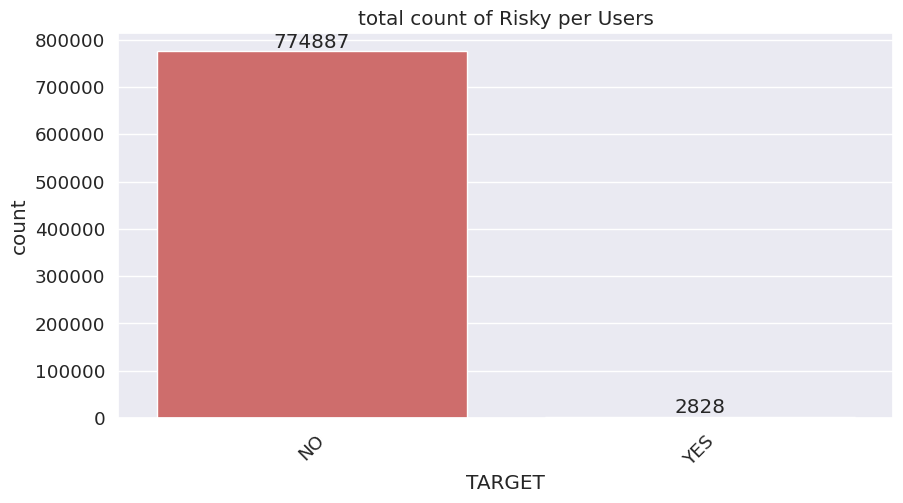

In [179]:
categorical_plotting(df,'TARGET','total count of Risky per Users')

<ipython-input-180-6d10f426c6f8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot= True)


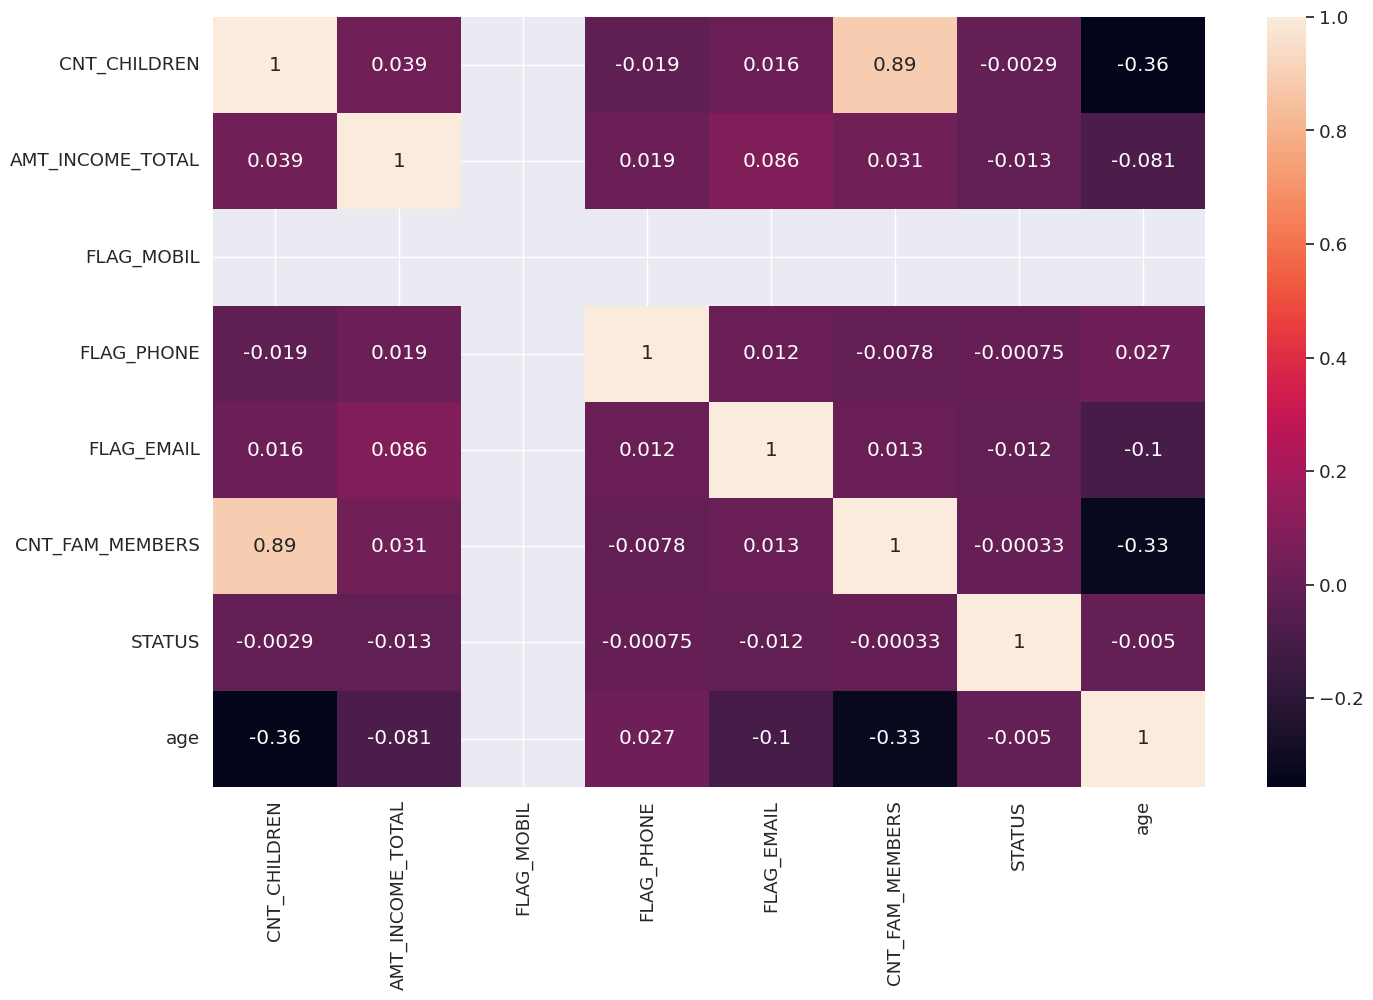

In [180]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot= True)
plt.show()

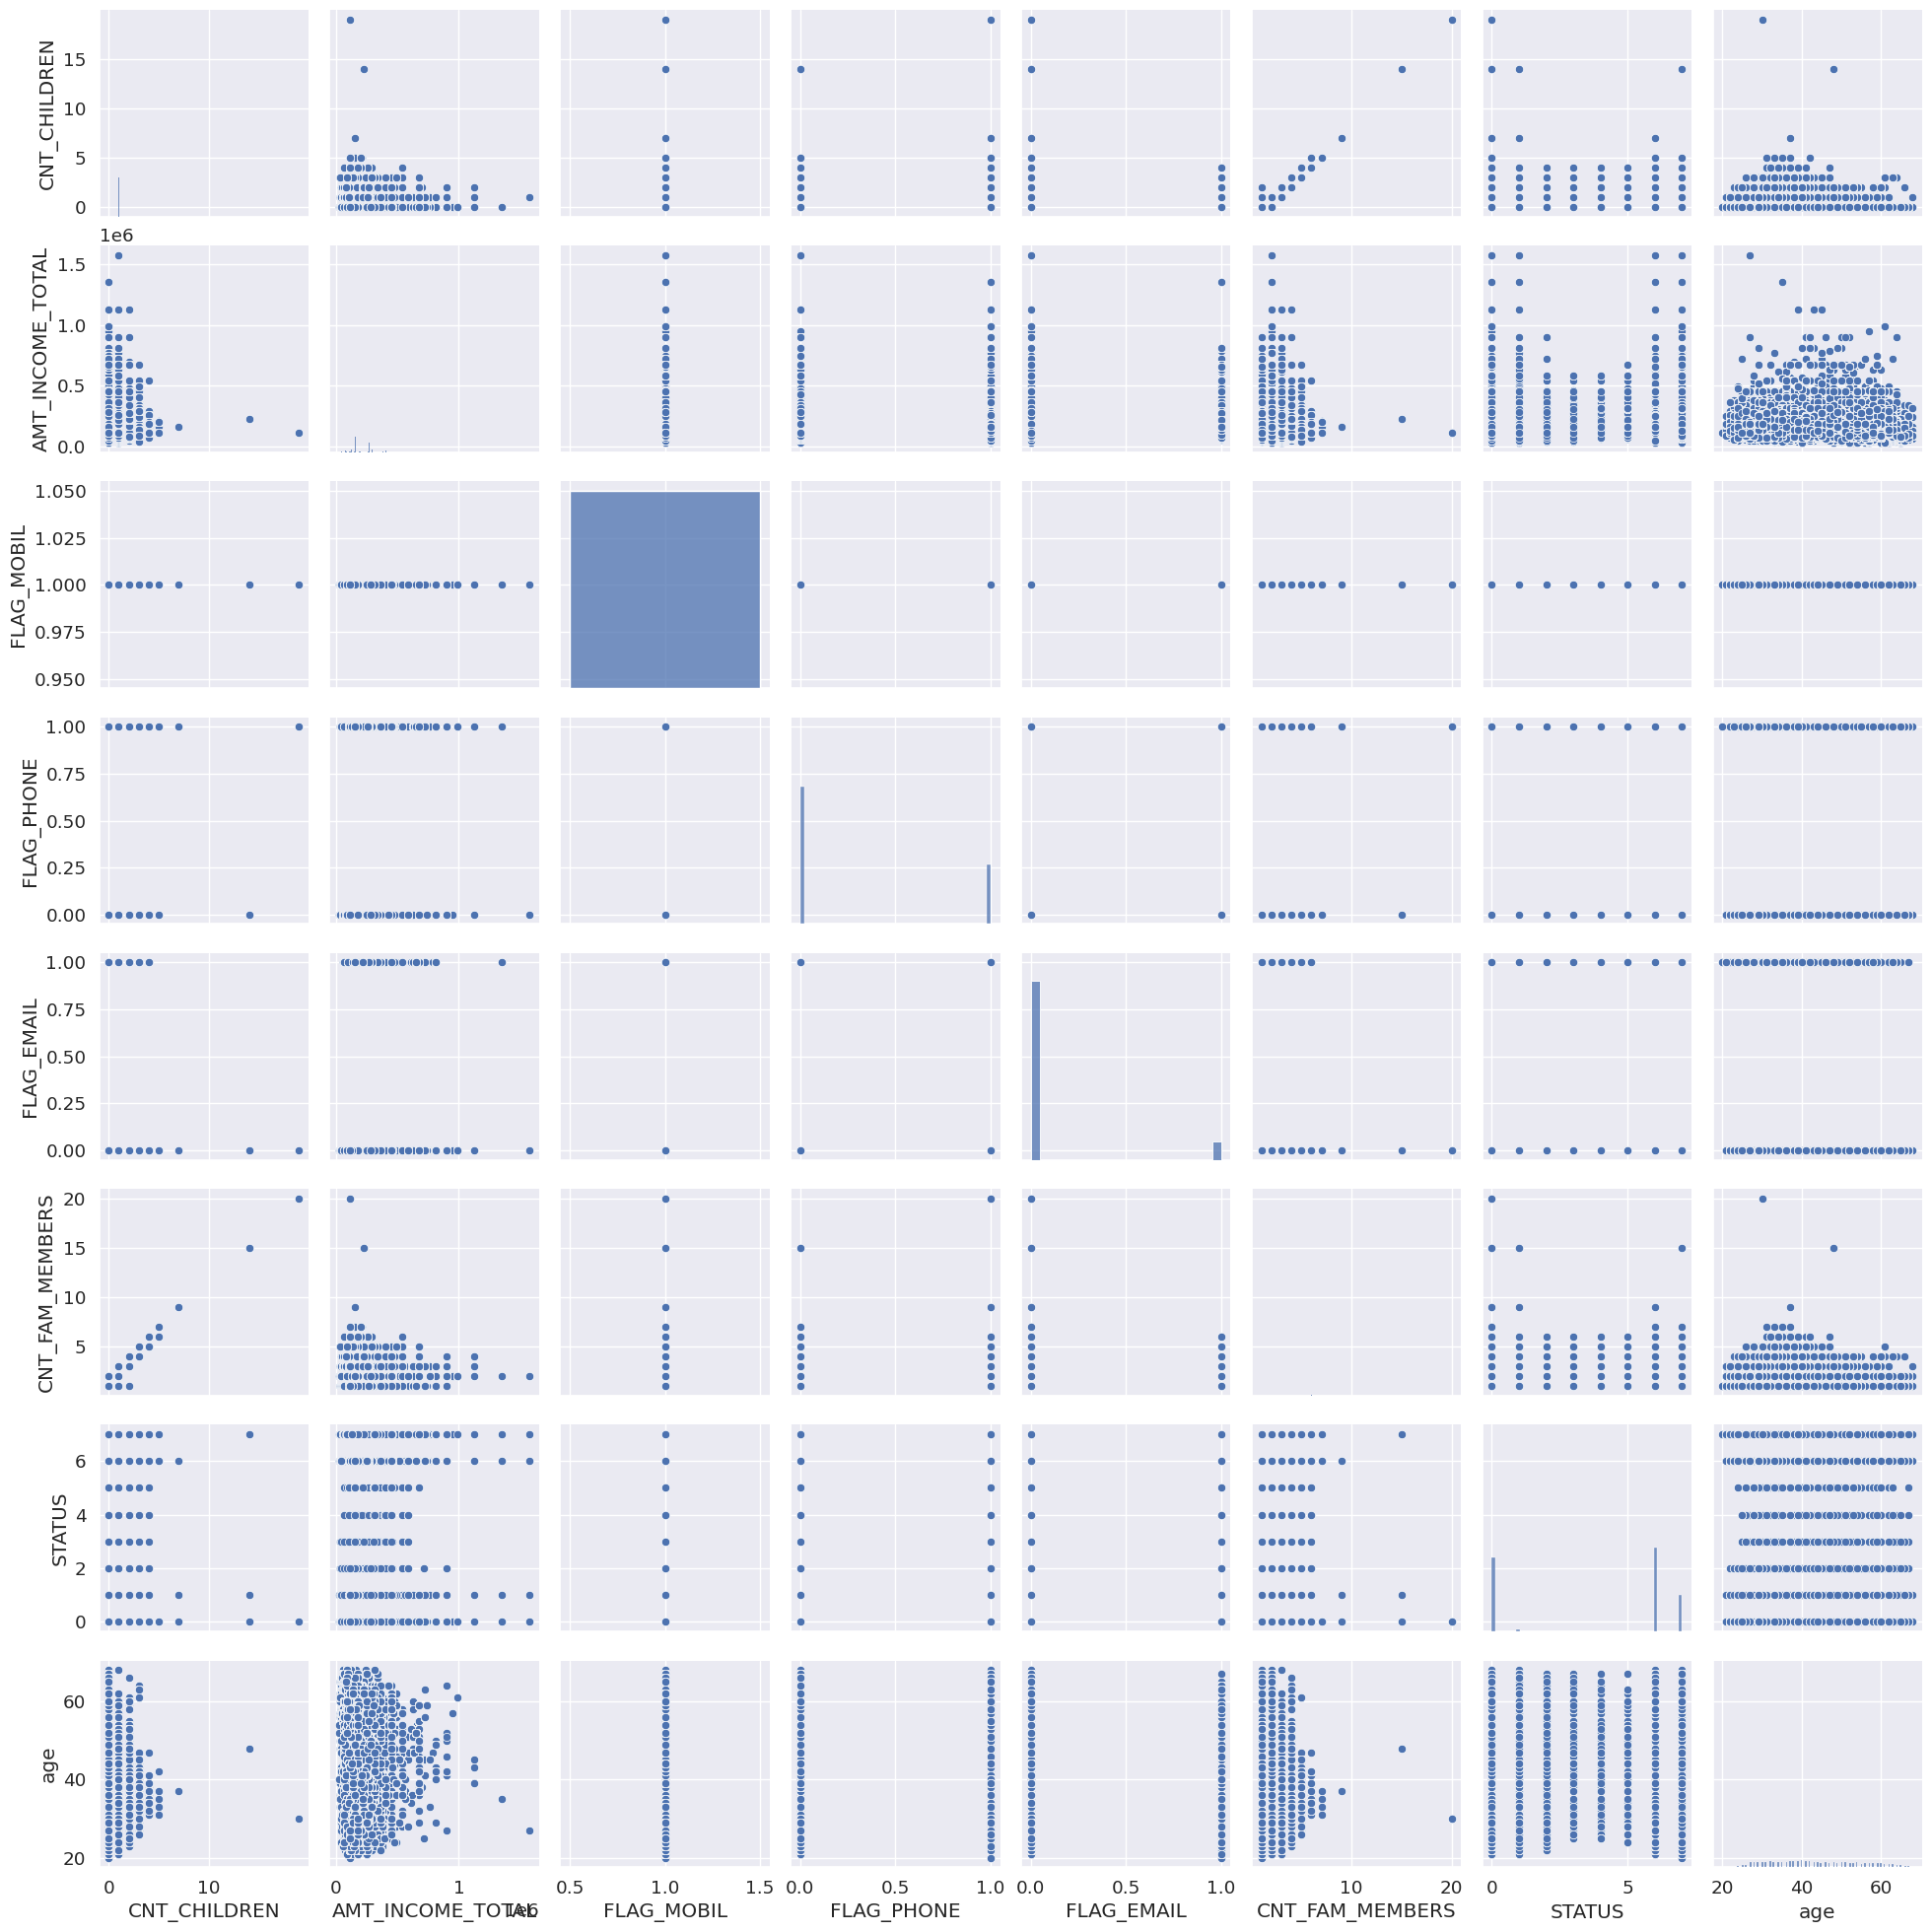

In [181]:
sns.pairplot(data=df )

* Dealing With Numerical Data .



In [182]:
#get all numerical column
numCol  = [col for col in df.columns if  df[col].dtype != "O"]
numCol

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'FLAG_MOBIL',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'STATUS',
 'age']

<font size="4" >**CNT_CHILDREN** </font> </br>




In [183]:
def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

<ipython-input-183-13bb0224ef0f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)


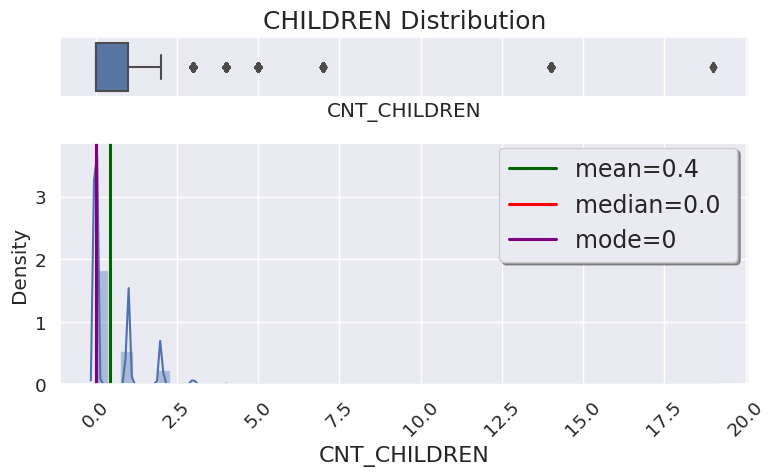

In [184]:
numerical_plotting(df,'CNT_CHILDREN','CHILDREN Distribution',' ')

In [185]:
df.describe()[['CNT_CHILDREN']].T

count      mean       std  min  25%  50%  75%   max
CNT_CHILDREN  777715.0  0.428082  0.745755  0.0  0.0  0.0  1.0  19.0

In [186]:
#what is more children count of data set ?
df['CNT_CHILDREN'].value_counts().sort_values(ascending=False).head(1)

0    540639
Name: CNT_CHILDREN, dtype: int64

In [187]:
#what is most five childern count ?
df['CNT_CHILDREN'].value_counts().sort_values(ascending=False).head(100)

0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: CNT_CHILDREN, dtype: int64

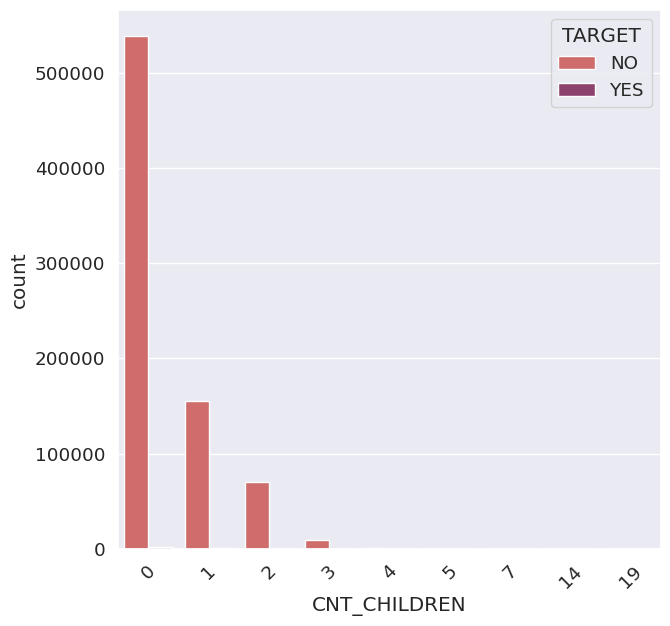

In [188]:
sns.countplot(x='CNT_CHILDREN',data=df,palette='flare',hue='TARGET')
plt.xticks(rotation=45)
plt.show()

<font size="4" >**AMT_INCOME_TOTAL** </font> </br>



<ipython-input-183-13bb0224ef0f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)


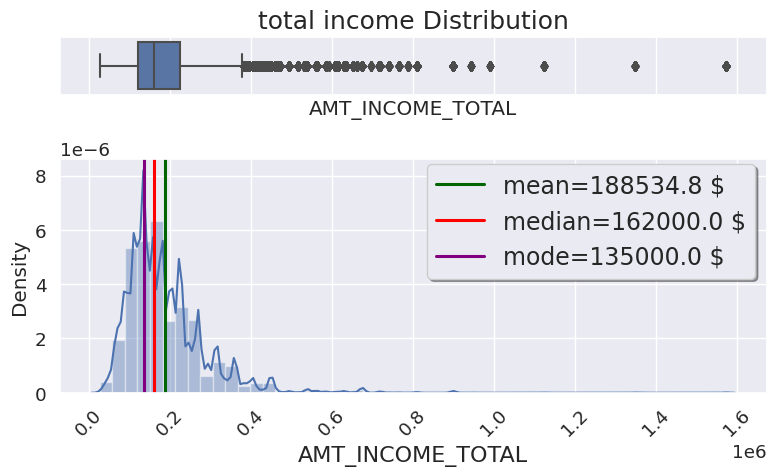

In [189]:
numerical_plotting(df,'AMT_INCOME_TOTAL','total income Distribution',' $')

In [190]:
df.describe()[['AMT_INCOME_TOTAL']].T

count           mean            std      min       25%  \
AMT_INCOME_TOTAL  777715.0  188534.802074  101622.450077  27000.0  121500.0   

                       50%       75%        max  
AMT_INCOME_TOTAL  162000.0  225000.0  1575000.0

In [191]:
#what is 5 height   total income  ?
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending=False).head(5)

135000.0    90217
180000.0    68579
157500.0    62686
112500.0    61622
225000.0    61399
Name: AMT_INCOME_TOTAL, dtype: int64

In [192]:
#5- what is tha total income with the target ?
df.groupby(['AMT_INCOME_TOTAL']).max()[['TARGET']].sort_values(by ='AMT_INCOME_TOTAL',ascending=False).head(5)

TARGET
AMT_INCOME_TOTAL       
1575000.0            NO
1350000.0            NO
1125000.0            NO
990000.0             NO
945000.0             NO

<font size="4" >**FLAG_MOBIL** </font> </br>




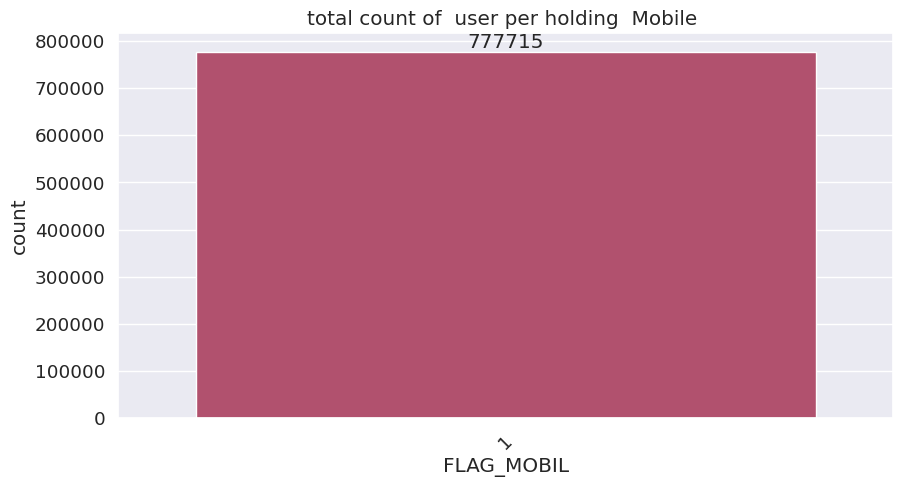

In [193]:
categorical_plotting(df,'FLAG_MOBIL','total count of  user per holding  Mobile ')

In [194]:
df['FLAG_MOBIL'].value_counts().sort_values(ascending=False).head(5)

1    777715
Name: FLAG_MOBIL, dtype: int64

<font size="4" >**FLAG_EMAIL** </font> </br>




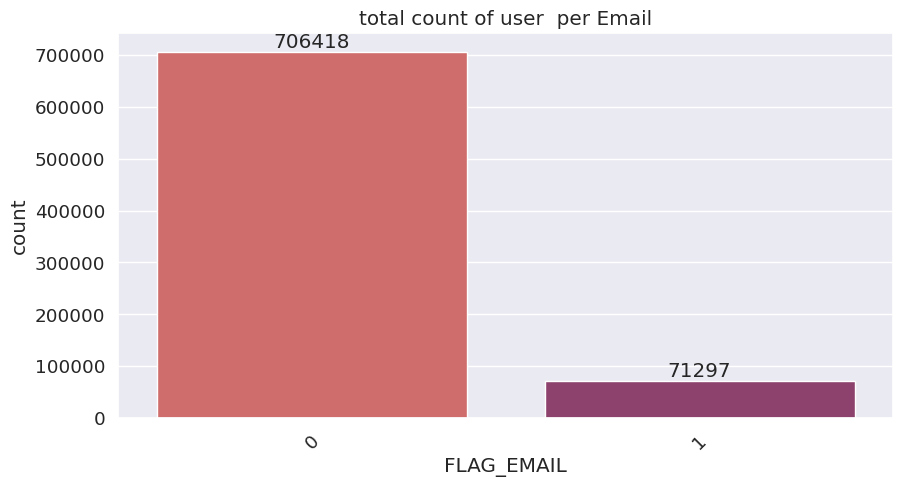

In [195]:
categorical_plotting(df,'FLAG_EMAIL','total count of user  per Email')

<font size="4" >**CNT_FAM_MEMBERS** </font> </br>




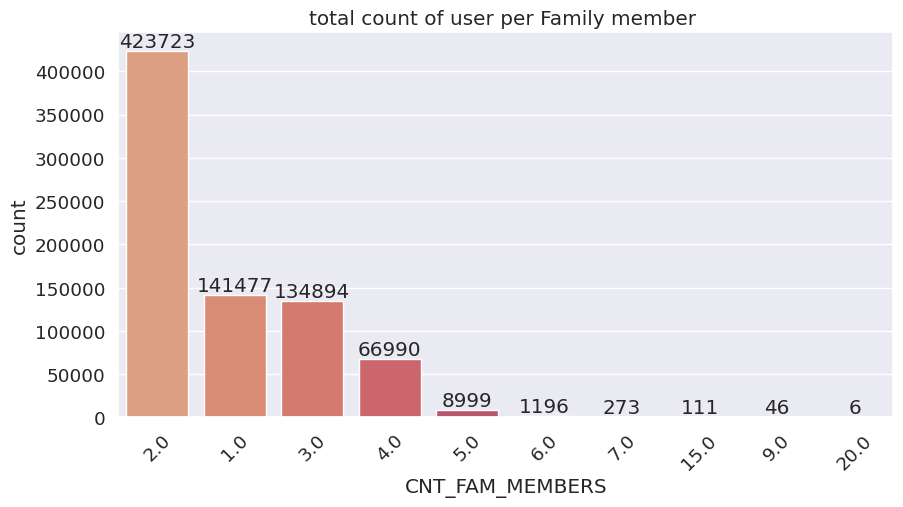

In [196]:
categorical_plotting(df,'CNT_FAM_MEMBERS','total count of user per Family member ')

In [197]:
def average_plotting(df,col,output,number,title):
    data_list = df[col].value_counts().index[:number].tolist()
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")
    plt.xticks(rotation=45);
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()


<ipython-input-197-d5aeff57984d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")


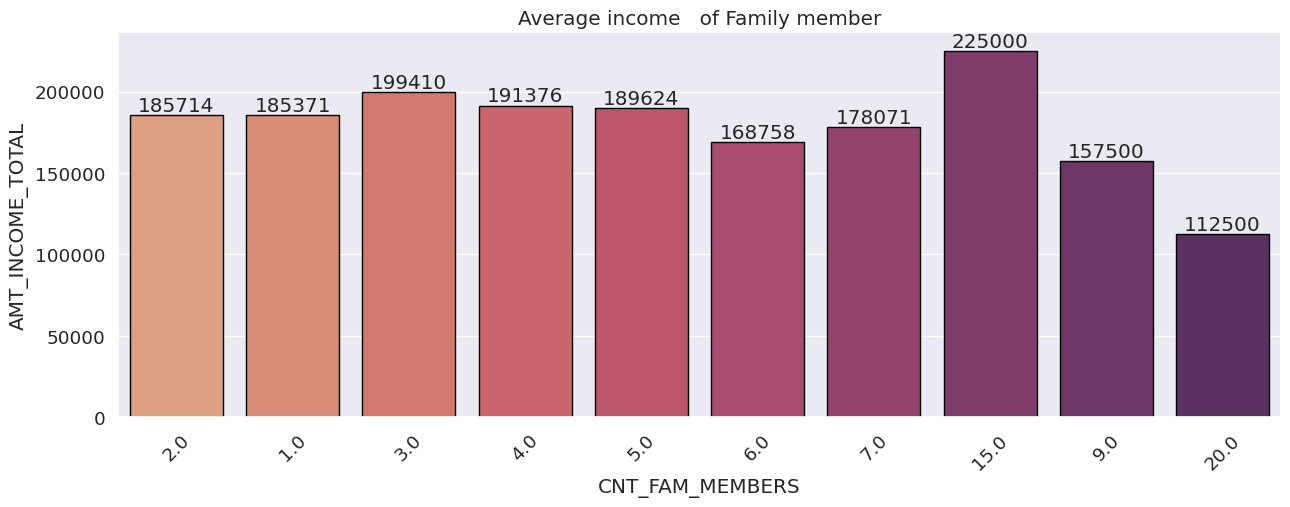

In [198]:
average_plotting(df,'CNT_FAM_MEMBERS','AMT_INCOME_TOTAL',15,'Average income   of Family member')

<font size="4" >**STATUS** </font> </br>




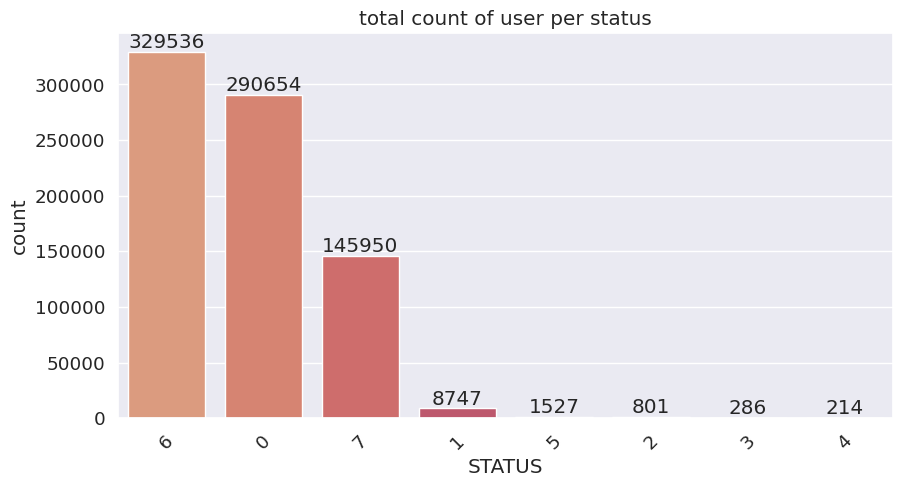

In [199]:
categorical_plotting(df,'STATUS','total count of user per status')

<ipython-input-197-d5aeff57984d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")


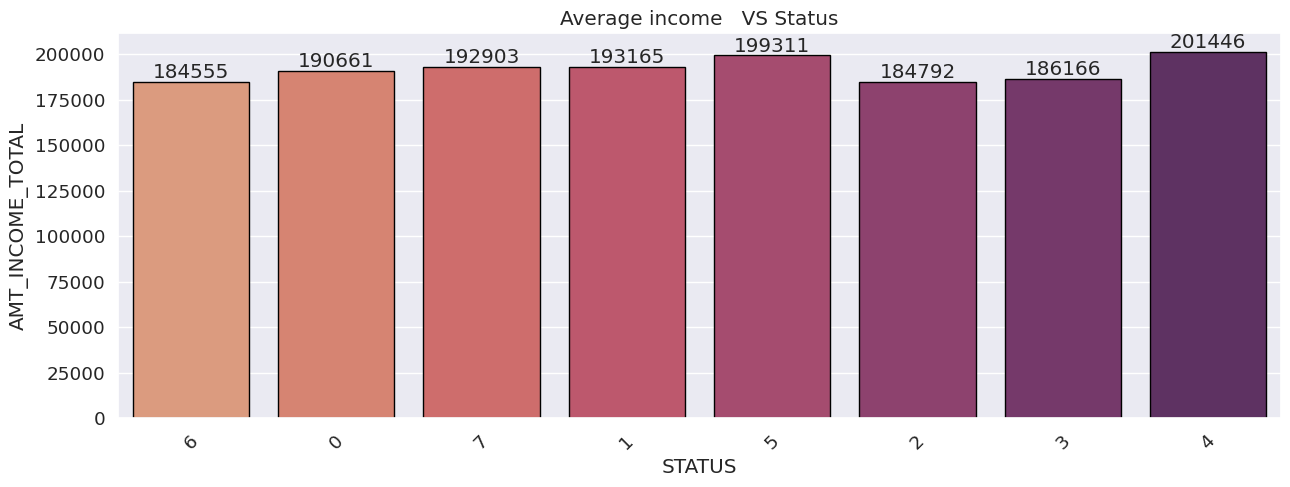

In [200]:
average_plotting(df,'STATUS','AMT_INCOME_TOTAL',15,'Average income   VS Status')

<font size="4" >**age** </font> </br>





<ipython-input-183-13bb0224ef0f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)


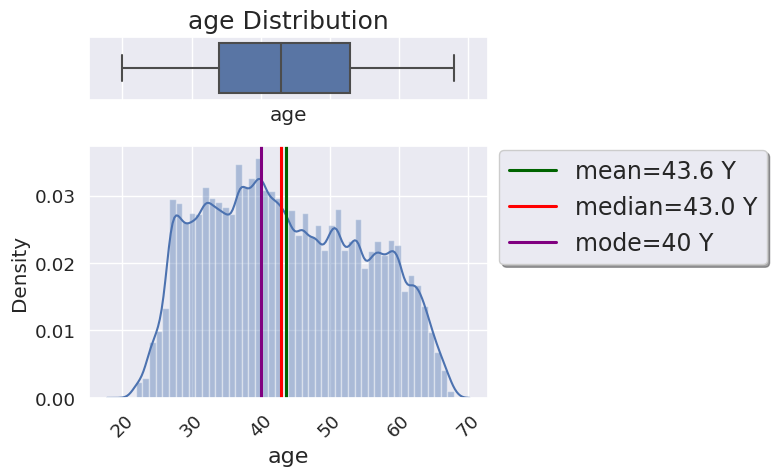

In [201]:
numerical_plotting(df,'age','age Distribution',' Y')

In [202]:
df.describe()[['age']].T

count       mean       std   min   25%   50%   75%   max
age  777715.0  43.643849  11.23955  20.0  34.0  43.0  53.0  68.0

In [203]:
#what is the most age in data set   ?
df['age'].value_counts(ascending=False).head(1)

40    26594
Name: age, dtype: int64

In [204]:
#what is 5 age in data set ?
df['age'].value_counts(ascending=False).head(5)

40    26594
37    25878
39    24346
38    23488
32    23317
Name: age, dtype: int64

<ipython-input-197-d5aeff57984d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")


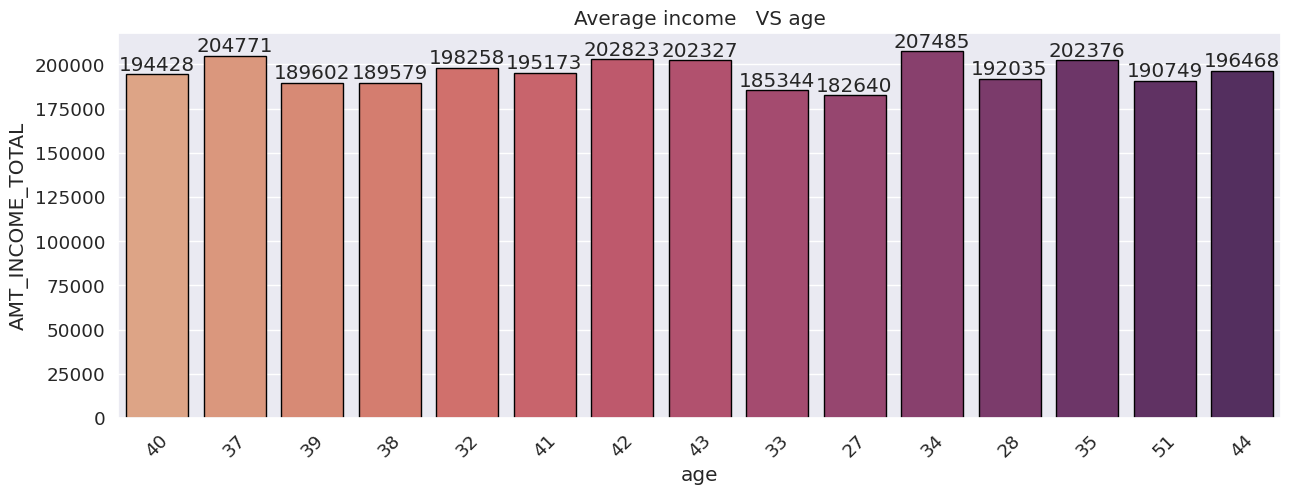

In [205]:
average_plotting(df,'age','AMT_INCOME_TOTAL',15,'Average income   VS age')

* Dealing with categorical Data

In [206]:
#get categorical columns
catCols = [col for col in df.columns if df[col].dtype=="O"]
catCols

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'TARGET']

<font size="4" >**CODE_GENDER** </font> </br>





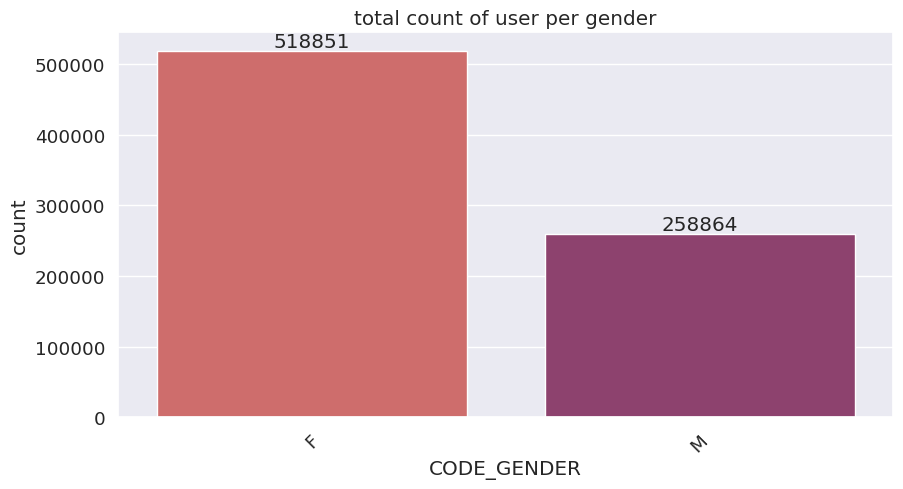

In [207]:
categorical_plotting(df,'CODE_GENDER','total count of user per gender')

In [208]:
#what is the averge  price per Gender ?
df.groupby('CODE_GENDER').mean()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False).head(5).T

<ipython-input-208-85b8916b7f35>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('CODE_GENDER').mean()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False).head(5).T


CODE_GENDER                   M             F
AMT_INCOME_TOTAL  217868.583436  173899.65638

<ipython-input-197-d5aeff57984d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")


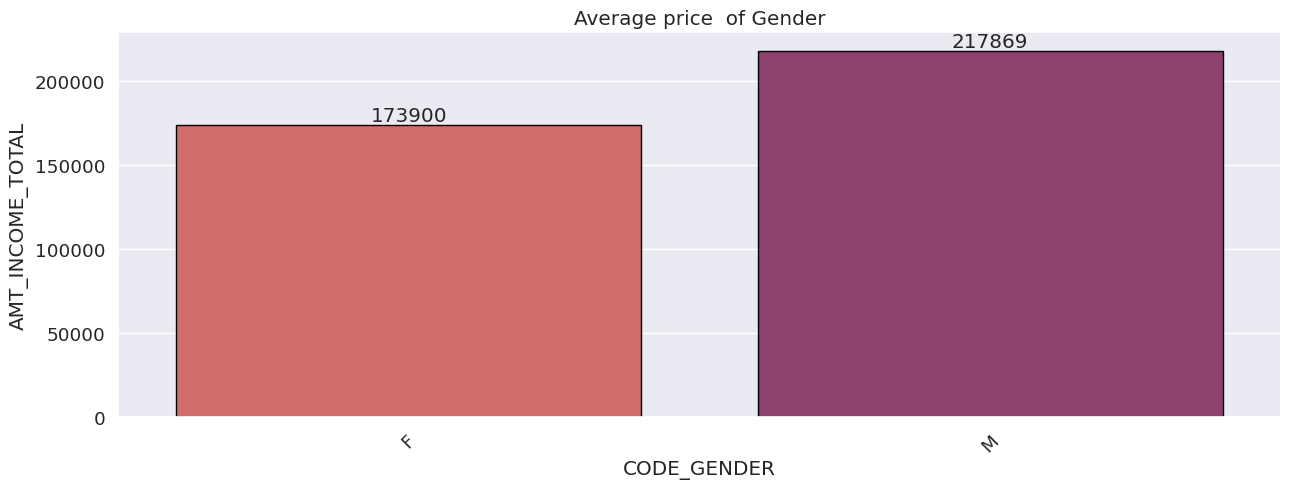

In [209]:
average_plotting(df,'CODE_GENDER','AMT_INCOME_TOTAL',15,'Average price  of Gender')

In [210]:
#what is the hight income  per gender ?
df.groupby(['CODE_GENDER']).max()[['AMT_INCOME_TOTAL']].sort_values(by ='AMT_INCOME_TOTAL',ascending=False).head(1)

AMT_INCOME_TOTAL
CODE_GENDER                  
F                   1575000.0

<font size="4" >**FLAG_OWN_CAR** </font> </br>






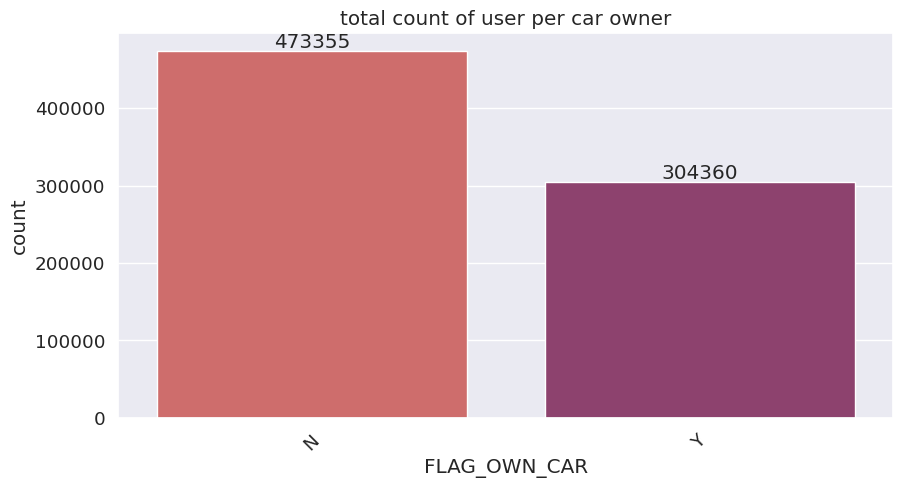

In [211]:
categorical_plotting(df,'FLAG_OWN_CAR','total count of user per car owner')

In [212]:
#what is the max income per car owner per user  ?
df.groupby('FLAG_OWN_CAR').max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

AMT_INCOME_TOTAL
FLAG_OWN_CAR                  
Y                    1575000.0
N                     990000.0

In [213]:
#what is the max income per car owner per user  ?
df.groupby('FLAG_OWN_CAR').max()[['AMT_INCOME_TOTAL','CODE_GENDER']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

AMT_INCOME_TOTAL CODE_GENDER
FLAG_OWN_CAR                              
Y                    1575000.0           M
N                     990000.0           M

<ipython-input-197-d5aeff57984d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")


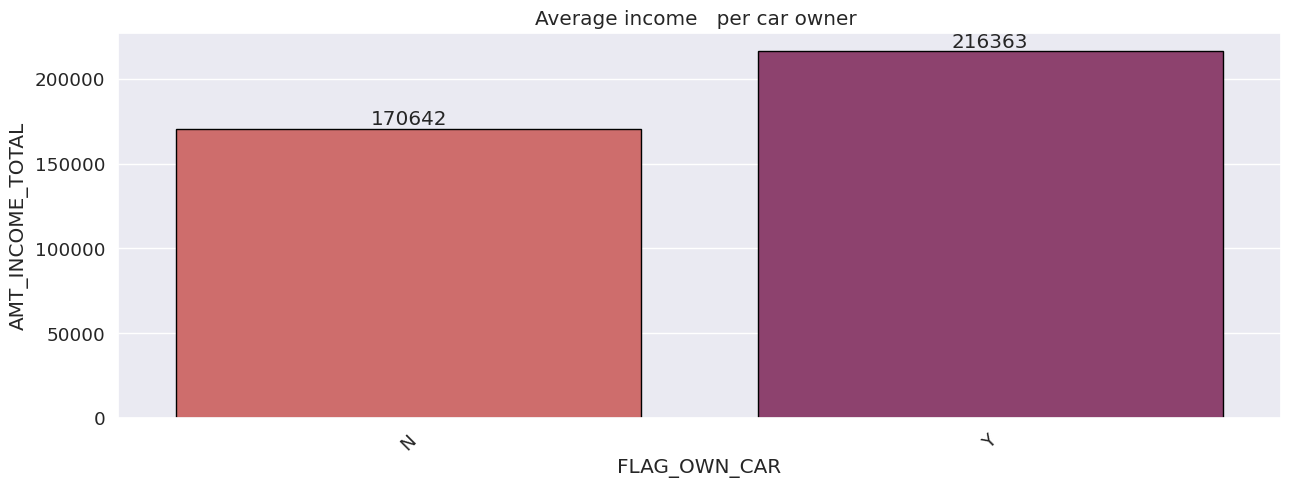

In [214]:
average_plotting(df,'FLAG_OWN_CAR','AMT_INCOME_TOTAL',15,'Average income   per car owner ')

<font size="4" >**FLAG_OWN_REALTY** </font> </br>




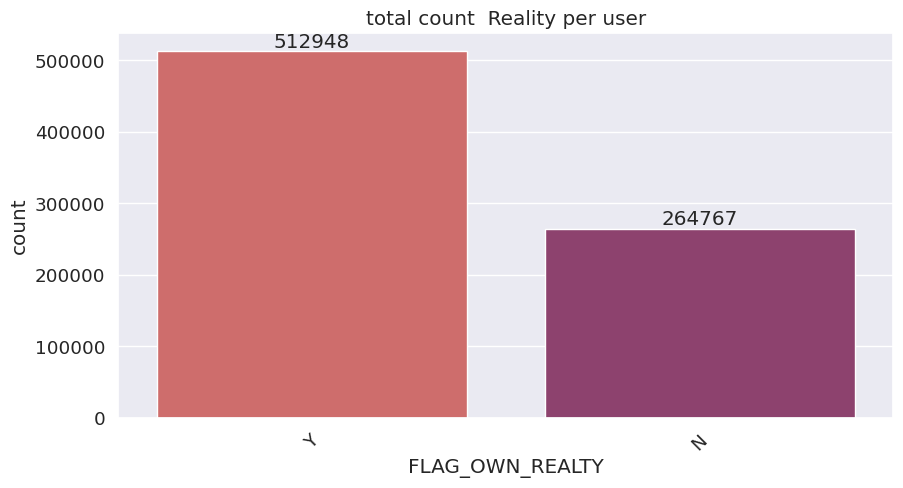

In [215]:
categorical_plotting(df,'FLAG_OWN_REALTY','total count  Reality per user')

In [216]:

df.groupby('FLAG_OWN_REALTY').max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

AMT_INCOME_TOTAL
FLAG_OWN_REALTY                  
Y                       1575000.0
N                       1350000.0

<ipython-input-197-d5aeff57984d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")


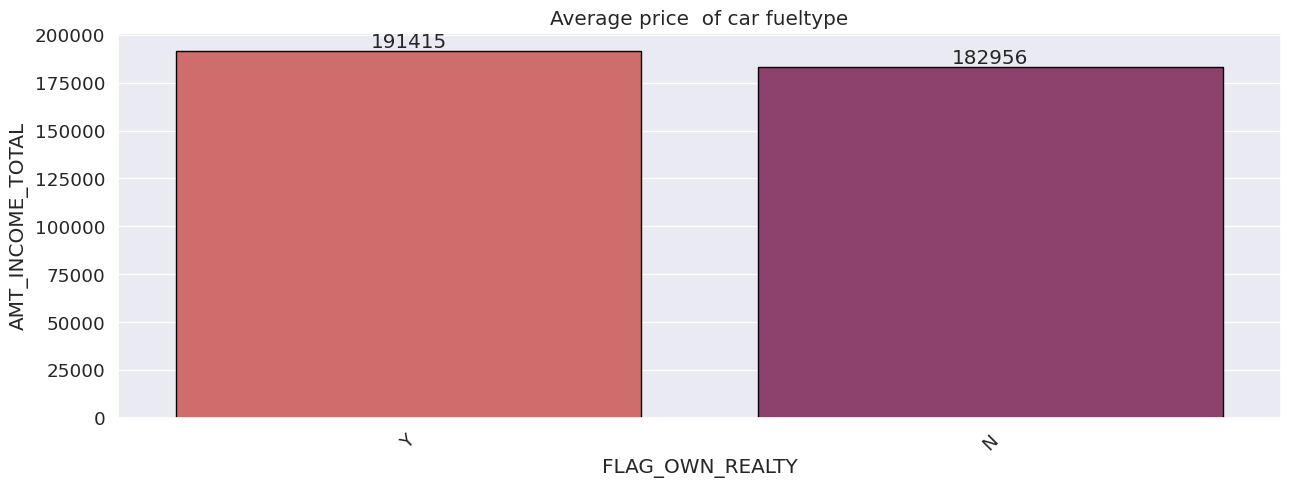

In [217]:
average_plotting(df,'FLAG_OWN_REALTY','AMT_INCOME_TOTAL',15,'Average price  of car fueltype')

<font size="4" >**NAME_INCOME_TYPE** </font> </br>




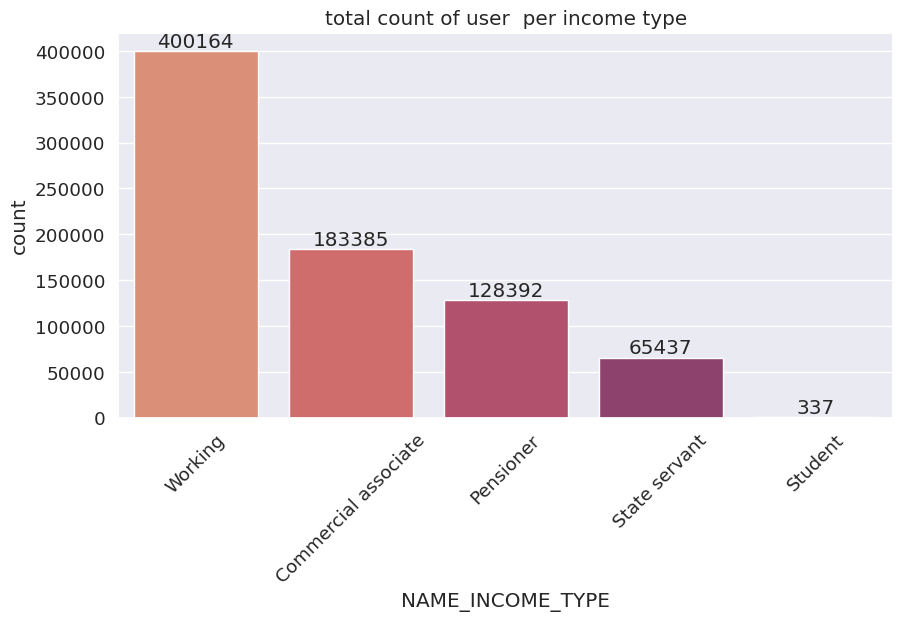

In [218]:
categorical_plotting(df,'NAME_INCOME_TYPE','total count of user  per income type')

In [219]:
#what is the max income  in each   income type   ?
df.groupby('NAME_INCOME_TYPE').max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

AMT_INCOME_TOTAL
NAME_INCOME_TYPE                      
Commercial associate         1575000.0
Working                      1125000.0
State servant                 990000.0
Pensioner                     742500.0
Student                       171000.0

In [220]:
#what is the average income  in each   income type   ?
df.groupby('NAME_INCOME_TYPE').mean()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

<ipython-input-220-507f4f65a43b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('NAME_INCOME_TYPE').mean()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)


AMT_INCOME_TOTAL
NAME_INCOME_TYPE                      
Commercial associate     220143.080666
State servant            202292.128841
Working                  184953.668583
Student                  164537.091988
Pensioner                147600.830870

<ipython-input-197-d5aeff57984d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")


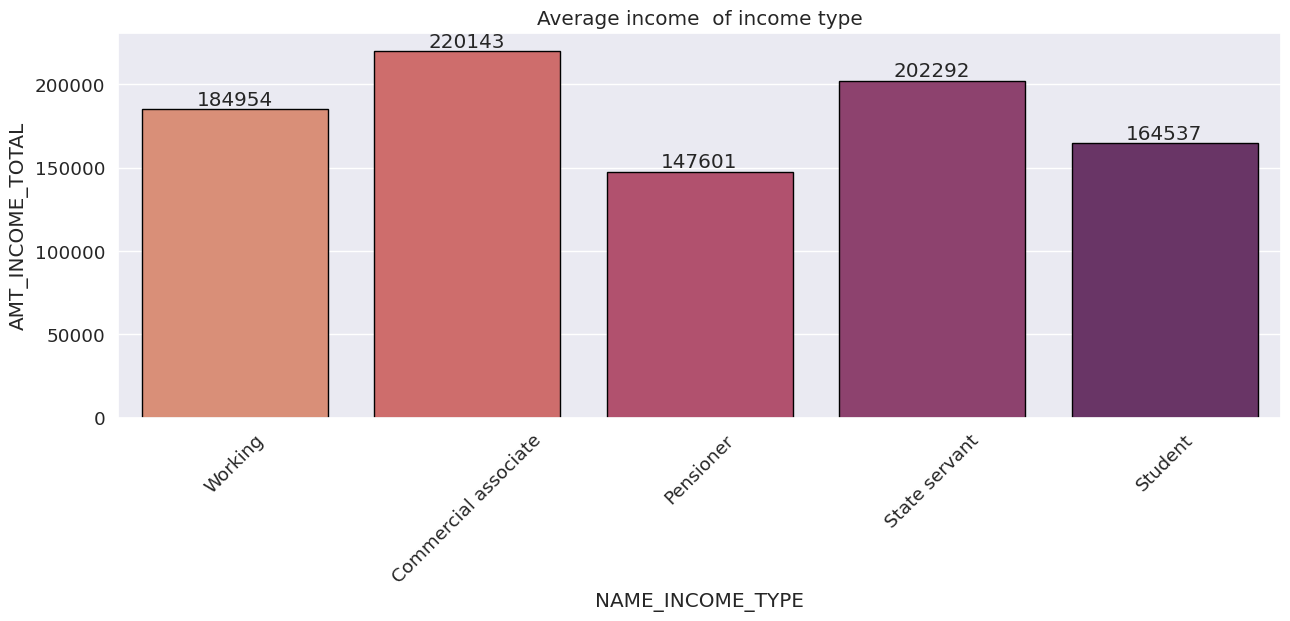

In [221]:
average_plotting(df,'NAME_INCOME_TYPE','AMT_INCOME_TOTAL',15,'Average income  of income type')

<font size="4" >**NAME_EDUCATION_TYPE** </font> </br>




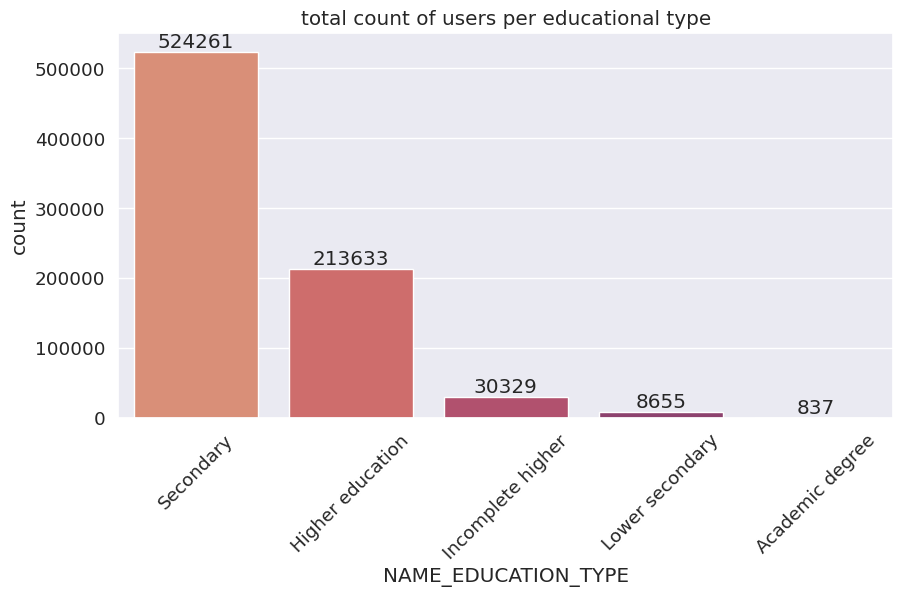

In [222]:
categorical_plotting(df,'NAME_EDUCATION_TYPE','total count of users per educational type')

In [223]:
#what is the max  income  in each   education type  per user   ?
df.groupby('NAME_EDUCATION_TYPE').max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

AMT_INCOME_TOTAL
NAME_EDUCATION_TYPE                  
Higher education            1575000.0
Secondary                   1125000.0
Incomplete higher            810000.0
Academic degree              450000.0
Lower secondary              360000.0

In [224]:
#what is the average  income  in each   education type  per user   ?
df.groupby('NAME_EDUCATION_TYPE').mean()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

<ipython-input-224-151939a03f7f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('NAME_EDUCATION_TYPE').mean()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)


AMT_INCOME_TOTAL
NAME_EDUCATION_TYPE                  
Academic degree         246021.505376
Higher education        225834.728651
Incomplete higher       202598.860826
Secondary               173178.357744
Lower secondary         143199.670711

<ipython-input-197-d5aeff57984d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")


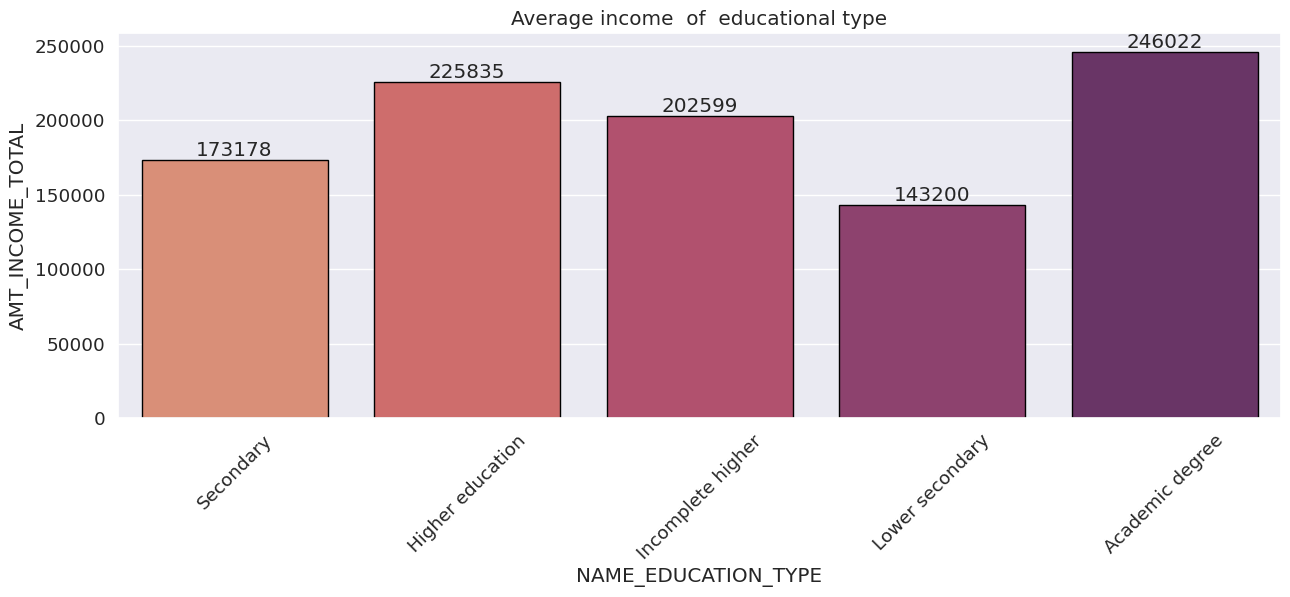

In [225]:
average_plotting(df,'NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL',15,'Average income  of  educational type')

<font size="4" >**NAME_FAMILY_STATUS** </font> </br>




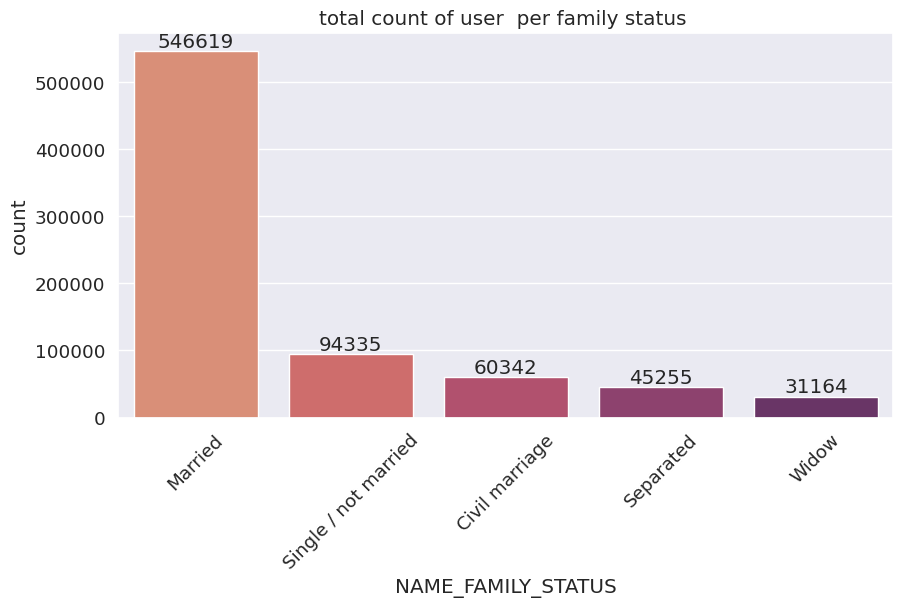

In [226]:
categorical_plotting(df,'NAME_FAMILY_STATUS','total count of user  per family status ')

In [227]:
df.groupby('NAME_FAMILY_STATUS').max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

AMT_INCOME_TOTAL
NAME_FAMILY_STATUS                    
Single / not married         1575000.0
Married                      1350000.0
Civil marriage                900000.0
Separated                     742500.0
Widow                         720000.0

In [228]:
df.groupby('NAME_FAMILY_STATUS').mean()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

<ipython-input-228-499e02010733>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('NAME_FAMILY_STATUS').mean()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)


AMT_INCOME_TOTAL
NAME_FAMILY_STATUS                    
Separated                194441.448823
Single / not married     192433.081937
Married                  189276.531145
Civil marriage           180838.356220
Widow                    170049.569214

<ipython-input-197-d5aeff57984d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")


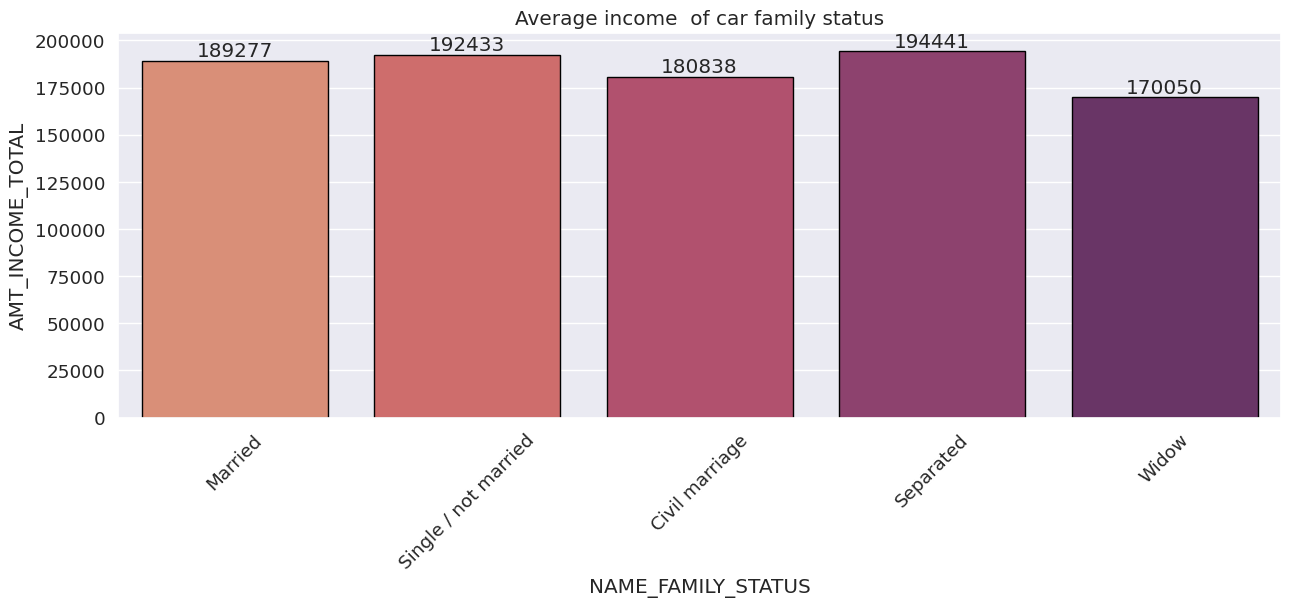

In [229]:
average_plotting(df,'NAME_FAMILY_STATUS','AMT_INCOME_TOTAL',15,'Average income  of car family status')

<font size="4" >**NAME_HOUSING_TYPE** </font> </br>





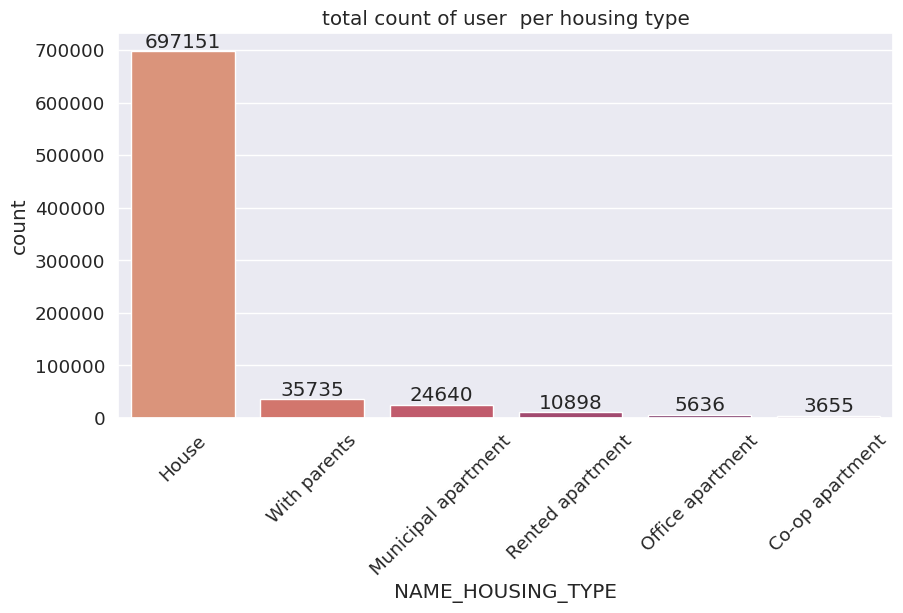

In [230]:
categorical_plotting(df,'NAME_HOUSING_TYPE','total count of user  per housing type')

In [231]:
df.groupby('NAME_HOUSING_TYPE').max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

AMT_INCOME_TOTAL
NAME_HOUSING_TYPE                    
House                       1575000.0
Municipal apartment         1350000.0
Rented apartment            1125000.0
Co-op apartment              900000.0
Office apartment             810000.0
With parents                 716323.5

In [232]:
df.groupby('NAME_HOUSING_TYPE').mean()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

<ipython-input-232-d9d8193379f4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('NAME_HOUSING_TYPE').mean()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)


AMT_INCOME_TOTAL
NAME_HOUSING_TYPE                    
Office apartment        221504.675302
Co-op apartment         220678.522572
Rented apartment        208373.362177
House                   188474.144781
With parents            182360.278774
Municipal apartment     178122.048458

<ipython-input-197-d5aeff57984d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")


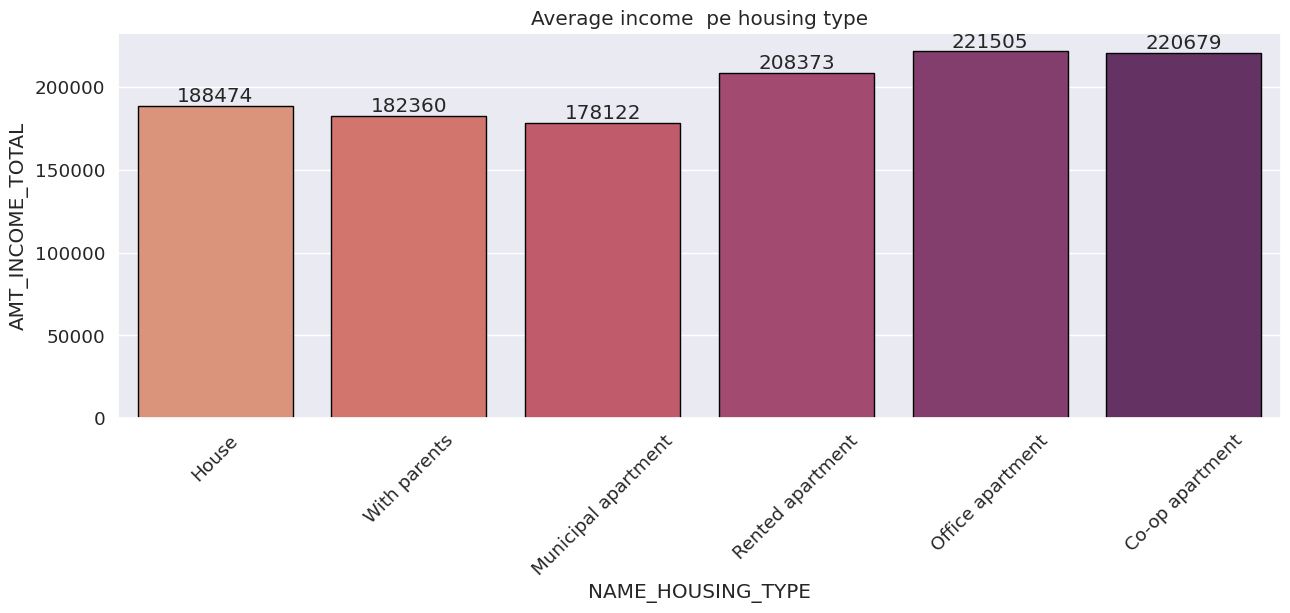

In [233]:
average_plotting(df,'NAME_HOUSING_TYPE','AMT_INCOME_TOTAL',15,'Average income  pe housing type')

<font size="4" >**OCCUPATION_TYPE** </font> </br>





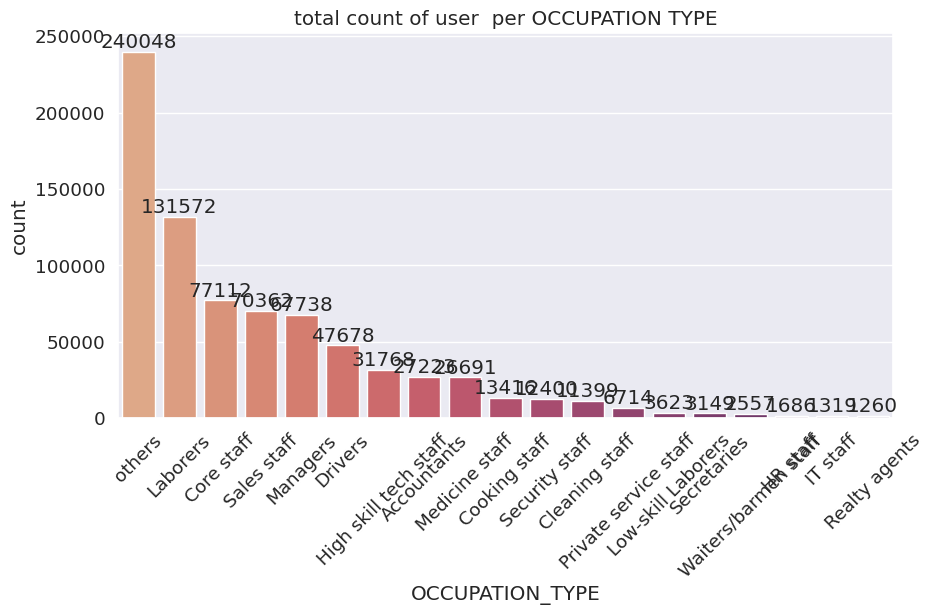

In [234]:
categorical_plotting(df,'OCCUPATION_TYPE','total count of user  per OCCUPATION TYPE')

<font size="4" >**TARGET** </font> </br>





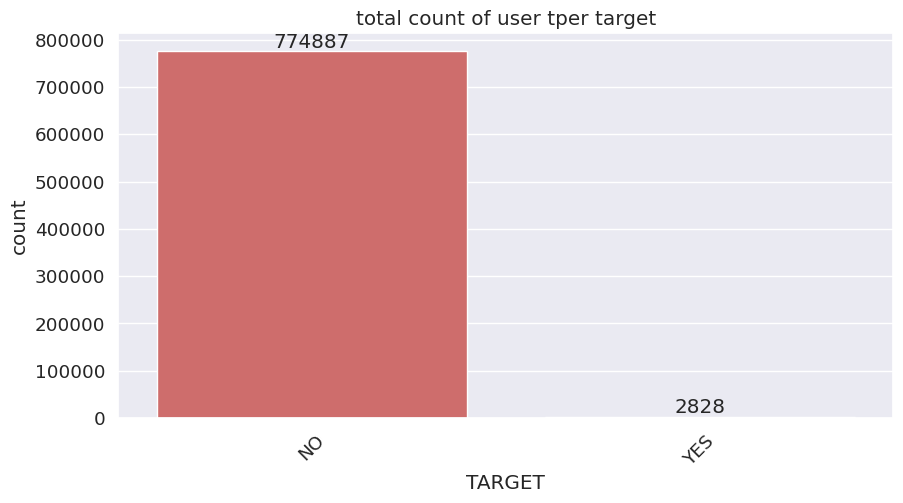

In [235]:
categorical_plotting(df,'TARGET','total count of user tper target')

In [236]:
df.groupby('TARGET').max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

AMT_INCOME_TOTAL
TARGET                  
NO             1575000.0
YES             900000.0

<ipython-input-197-d5aeff57984d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")


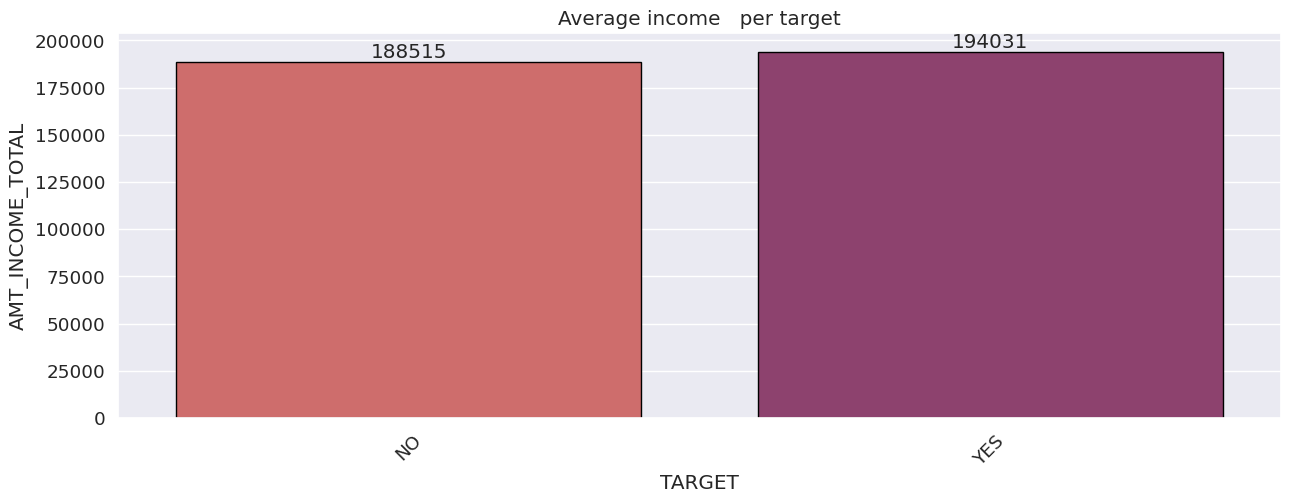

In [237]:
average_plotting(df,'TARGET','AMT_INCOME_TOTAL',15,'Average income   per target')

# 6. Data preprocessing

In [238]:
df

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0                M            Y               Y             0   
1                M            Y               Y             0   
2                M            Y               Y             0   
3                M            Y               Y             0   
4                M            Y               Y             0   
...            ...          ...             ...           ...   
777710           M            N               Y             0   
777711           M            N               Y             0   
777712           M            N               Y             0   
777713           M            N               Y             0   
777714           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0               427500.0          Working    Higher education   
1               427500.0          Working    Higher education   
2               427500.0          Working    Higher education   
3               427500.0          Working    Higher education   
4               427500.0          Working    Higher education   
...                  ...              ...                 ...   
777710          112500.0          Working           Secondary   
777711          112500.0          Working           Secondary   
777712          112500.0          Working           Secondary   
777713          112500.0          Working           Secondary   
777714          112500.0          Working           Secondary   

          NAME_FAMILY_STATUS NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_PHONE  \
0             Civil marriage  Rented apartment           1           0   
1             Civil marriage  Rented apartment           1           0   
2             Civil marriage  Rented apartment           1           0   
3             Civil marriage  Rented apartment           1           0   
4             Civil marriage  Rented apartment           1           0   
...                      ...               ...         ...         ...   
777710  Single / not married  Rented apartment           1           0   
777711  Single / not married  Rented apartment           1           0   
777712  Single / not married  Rented apartment           1           0   
777713  Single / not married  Rented apartment           1           0   
777714  Single / not married  Rented apartment           1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  STATUS  age TARGET  
0                0          others              2.0       6   32     NO  
1                0          others              2.0       6   32     NO  
2                0          others              2.0       6   32     NO  
3                0          others              2.0       6   32     NO  
4                0          others              2.0       6   32     NO  
...            ...             ...              ...     ...  ...    ...  
777710           0        Laborers              1.0       0   25     NO  
777711           0        Laborers              1.0       2   25    YES  
777712           0        Laborers              1.0       1   25     NO  
777713           0        Laborers              1.0       0   25     NO  
777714           0        Laborers              1.0       0   25     NO  

[777715 rows x 17 columns]

In [239]:
# start label enncoder
column_data = ["TARGET","CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]
for col in column_data:
    label = LabelEncoder()
    df[col] = label.fit_transform(df[col].values)

In [240]:
df = pd.get_dummies(df, drop_first=True, columns=['OCCUPATION_TYPE'])
df.head()


CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            1             1                1             0          427500.0   
1            1             1                1             0          427500.0   
2            1             1                1             0          427500.0   
3            1             1                1             0          427500.0   
4            1             1                1             0          427500.0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 4                    1                   0   
1                 4                    1                   0   
2                 4                    1                   0   
3                 4                    1                   0   
4                 4                    1                   0   

   NAME_HOUSING_TYPE  FLAG_MOBIL  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0                  4           1  ...                                   0   
1                  4           1  ...                                   0   
2                  4           1  ...                                   0   
3                  4           1  ...                                   0   
4                  4           1  ...                                   0   

   OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                         0                               0   
1                         0                               0   
2                         0                               0   
3                         0                               0   
4                         0                               0   

   OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   

   OCCUPATION_TYPE_Sales staff  OCCUPATION_TYPE_Secretaries  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   OCCUPATION_TYPE_Security staff  OCCUPATION_TYPE_Waiters/barmen staff  \
0                               0                                     0   
1                               0                                     0   
2                               0                                     0   
3                               0                                     0   
4                               0                                     0   

   OCCUPATION_TYPE_others  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  

[5 rows x 34 columns]

In [241]:
df.shape

(777715, 34)

In [242]:
x = df.drop(['TARGET'], axis=True)
y = df['TARGET']

In [243]:
# data standarization
sc=StandardScaler()
x_scaled = sc.fit_transform(x)

# 5 Dimensionality reduction by PCA

In [244]:
pca = PCA()
pct = pca.fit_transform(x_scaled)
print(np.round(pca.explained_variance_ratio_,decimals=3))
print('3 components explaining: ',sum(pca.explained_variance_ratio_[:3]))
print('4 components explaining: ',sum(pca.explained_variance_ratio_[:4]))
print('5 components explaining: ',sum(pca.explained_variance_ratio_[:5]))
print('6 components explaining: ',sum(pca.explained_variance_ratio_[:6]))
print('7 components explaining: ',sum(pca.explained_variance_ratio_[:7]))
print('8 components explaining: ',sum(pca.explained_variance_ratio_[:8]))
print('9 components explaining: ',sum(pca.explained_variance_ratio_[:9]))
print('10 components explaining: ',sum(pca.explained_variance_ratio_[:10]))
print('11 components explaining: ',sum(pca.explained_variance_ratio_[:11]))
print('12 components explaining: ',sum(pca.explained_variance_ratio_[:12]))
print('13 components explaining: ',sum(pca.explained_variance_ratio_[:13]))
print('14 components explaining: ',sum(pca.explained_variance_ratio_[:14]))
print('15 components explaining: ',sum(pca.explained_variance_ratio_[:15]))
print('16 components explaining: ',sum(pca.explained_variance_ratio_[:16]))
print('17 components explaining: ',sum(pca.explained_variance_ratio_[:17]))
print('18 components explaining: ',sum(pca.explained_variance_ratio_[:18]))
print('19 components explaining: ',sum(pca.explained_variance_ratio_[:19]))
print('20 components explaining: ',sum(pca.explained_variance_ratio_[:20]))
print('21 components explaining: ',sum(pca.explained_variance_ratio_[:21]))
print('22 components explaining: ',sum(pca.explained_variance_ratio_[:22]))
print('23 components explaining: ',sum(pca.explained_variance_ratio_[:23]))
print('24 components explaining: ',sum(pca.explained_variance_ratio_[:24]))
print('25 components explaining: ',sum(pca.explained_variance_ratio_[:25]))
print('26 components explaining: ',sum(pca.explained_variance_ratio_[:26]))
print('27 components explaining: ',sum(pca.explained_variance_ratio_[:27]))
print('28 components explaining: ',sum(pca.explained_variance_ratio_[:28]))
print('29 components explaining: ',sum(pca.explained_variance_ratio_[:29]))
print('30 components explaining: ',sum(pca.explained_variance_ratio_[:30]))

[0.088 0.054 0.051 0.047 0.038 0.036 0.035 0.034 0.034 0.033 0.032 0.032
 0.032 0.032 0.032 0.032 0.031 0.031 0.031 0.031 0.03  0.03  0.026 0.025
 0.025 0.024 0.022 0.021 0.016 0.014 0.001 0.001 0.   ]
3 components explaining:  0.19306925128466973
4 components explaining:  0.2397937344816127
5 components explaining:  0.27764978601988577
6 components explaining:  0.3132052933029744
7 components explaining:  0.3479939178271909
8 components explaining:  0.38188096242838243
9 components explaining:  0.4153828119515309
10 components explaining:  0.4481093335884963
11 components explaining:  0.48055553942141294
12 components explaining:  0.5127234630278242
13 components explaining:  0.5448253672794523
14 components explaining:  0.5765352677377347
15 components explaining:  0.6082278303598443
16 components explaining:  0.6397542863133753
17 components explaining:  0.6711591871232804
18 components explaining:  0.702507764120531
19 components explaining:  0.7337753573305312
20 components explai

* Imbalanced Target?
* Under Sampling

Class=0, n=2828 (50.000%)
Class=1, n=2828 (50.000%)


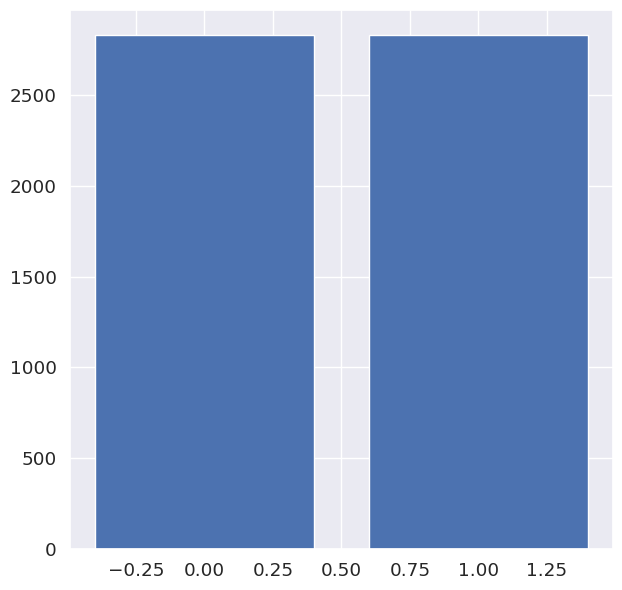

In [245]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
undersample = RandomUnderSampler(random_state=0)
X, y = undersample.fit_resample(x_scaled, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [246]:
x_train ,x_test ,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42,shuffle=True)

# 6. Models


##6-1. Logistic regression

In [247]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [248]:
y_pred       = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

In [249]:
print("Percition   using LG  on test Data  : {:.2f} %".format(np.round(precision_score(y_test,y_pred),4)*100))
print("Recall      using LG  on test Data  : {:.2f} %".format(np.round(recall_score(y_test,y_pred),4)*100))
print("Accurcy     using LG  on test Data  : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred),4)*100))

Percition   using LG  on test Data  : 59.43 %
Recall      using LG  on test Data  : 61.61 %
Accurcy     using LG  on test Data  : 61.23 %


In [250]:
lr.coef_

array([[ 0.19008011, -0.03571047, -0.06793227, -0.22569091, -0.0160175 ,
        -0.22256095, -0.1710649 ,  0.32566344,  0.06617604,  0.        ,
         0.09787077, -0.09807556,  0.36219965, -0.08776978,  0.15066035,
        -0.0583094 ,  0.0397008 , -0.04627786,  0.02666696, -0.28720789,
         0.03212899,  0.15064386, -0.02095797,  0.08292155, -0.05042776,
        -0.11968216, -0.1585374 , -0.24566527, -0.12145229, -0.15549246,
         0.09249614,  0.01177981, -0.08482948]])

In [251]:
lr_df = pd.DataFrame({"actual":y_test,"predicted":y_pred})
lr_df.head(5)

actual  predicted
3948       1          1
5097       1          0
3689       1          0
1499       0          1
5217       1          1

## 6-2. SVC

In [252]:
def svc_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define parameters
    params = {
    'kernel'          : trial.suggest_categorical('kernel', ['linear','poly','rbf','sigmoid']),
    'gamma'           : trial.suggest_loguniform('gamma', 1e-3, 5.0),
    # 'epsilon'         : trial.suggest_loguniform('epsilon', 1e-3, 5.0),
    'C'               :  trial.suggest_loguniform('C',1e-5,1e5),
    'degree'          : trial.suggest_categorical('degree', [1,3,5]),
    'max_iter'        : trial.suggest_categorical('max_iter', [1000,2000,3000,4000,5000,6000,7000]),
    }
    #creat model anf pass parameters
    model =SVC(**params)
    model.fit(x_train, y_train)
    predection = model.predict(x_test)
    acc = accuracy_score(y_test, predection)
    return acc


In [253]:
study = optuna.create_study(direction="minimize")
#start serach
study.optimize(svc_optuna, n_trials=200)

[I 2023-06-19 04:47:15,886] A new study created in memory with name: no-name-f1b61865-f9b2-4095-b0ba-7fe33cef075d
<ipython-input-252-a0e4c868e4a0>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma'           : trial.suggest_loguniform('gamma', 1e-3, 5.0),
<ipython-input-252-a0e4c868e4a0>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C'               :  trial.suggest_loguniform('C',1e-5,1e5),
[I 2023-06-19 04:47:16,878] Trial 0 finished with value: 0.586328815556865 and parameters: {'kernel': 'poly', 'gamma': 0.07603552373441978, 'C': 0.00013525824742121833, 'degree': 5, 'max_iter': 7000}. Best is trial 0 with value: 0.586328815556865.
<ipython-input-252-a0e4c8

In [254]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 0.3877430760164997
  Params: 
    kernel: sigmoid
    gamma: 1.395607093408504
    C: 0.07199196077306724
    degree: 3
    max_iter: 2000


In [255]:
from sklearn.svm import SVC
svc_best = SVC(kernel='sigmoid',C=0.30430932158451696, degree=3,
               gamma=1.9411547934320157, max_iter=1000)
svc_best.fit(x_train,y_train)
y_pred_svc         = svc_best.predict(x_test)
y_pred_train_sc   = svc_best.predict(x_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [256]:
print("Percition   using SVC  on test  Data  : {:.2f} %".format(np.round(precision_score(y_test, y_pred_svc),4)*100))
print("Recall      using SVC  on test Data : {:.2f} %".format(np.round(recall_score(y_test, y_pred_svc),4)*100))
print("Accurcy     using SVC  on test Data : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_svc),4)*100))

Percition   using SVC  on test  Data  : 42.37 %
Recall      using SVC  on test Data : 72.00 %
Accurcy     using SVC  on test Data : 39.30 %


In [257]:
svc_df = pd.DataFrame({"actual":y_test ,"predicted":y_pred_svc,})
svc_df.tail(5)


actual  predicted
1434       0          1
1135       0          1
3382       1          0
868        0          0
701        0          1

##6-3. KNN

In [258]:
def knn_classifier_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define parameters
    params = {
    'n_neighbors'     : trial.suggest_categorical('n_neighbors', [1,3,5,7]),
    'weights'         : trial.suggest_categorical('weights', ['uniform','distance']),
    'algorithm'       : trial.suggest_categorical('algorithm',['auto','ball_tree','kd_tree','brute']),
    'leaf_size'       : trial.suggest_int('leaf_size', 30, 150),
    'p'               : trial.suggest_int('p', 2, 50),

    }
    #creat model anf pass parameters
    model = KNeighborsClassifier(**params)
    model = KNeighborsClassifier(**params)
    model.fit(x_train, y_train)
    predection = model.predict(x_test)
    acc = accuracy_score(y_test, predection)
    return acc


In [259]:
study = optuna.create_study(direction="minimize")
#start serach
study.optimize(knn_classifier_optuna, n_trials=200)

[I 2023-06-19 04:52:15,035] A new study created in memory with name: no-name-5f403007-fab5-43ac-9934-28e5ffa5413e
[I 2023-06-19 04:52:18,555] Trial 0 finished with value: 0.8202710665880967 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 91, 'p': 25}. Best is trial 0 with value: 0.8202710665880967.
[I 2023-06-19 04:52:22,065] Trial 1 finished with value: 0.8933411903358869 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 66, 'p': 8}. Best is trial 0 with value: 0.8202710665880967.
[I 2023-06-19 04:52:27,041] Trial 2 finished with value: 0.8526812021213906 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 58, 'p': 10}. Best is trial 0 with value: 0.8202710665880967.
[I 2023-06-19 04:52:30,605] Trial 3 finished with value: 0.8173246906305245 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 118, 'p': 10}.

In [260]:

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 0.8020035356511491
  Params: 
    n_neighbors: 7
    weights: uniform
    algorithm: auto
    leaf_size: 145
    p: 50


In [261]:
knn_best = KNeighborsClassifier(n_neighbors=7,weights='uniform',algorithm='auto',leaf_size=70,p=49)

knn_best.fit(x_train,y_train)
y_pred_knn = knn_best.predict(x_test)
y_pred_train_knn   = knn_best.predict(x_train)

In [262]:
print("Percition   using KNN  on test  Data  : {:.2f} %".format(np.round(precision_score(y_test, y_pred_knn),4)*100))
print("Recall      using KNN  on test Data   : {:.2f} %".format(np.round(recall_score(y_test, y_pred_knn),4)*100))
print("Accurcy     using KNN  on test Data   : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_knn),4)*100))

Percition   using KNN  on test  Data  : 75.39 %
Recall      using KNN  on test Data   : 87.65 %
Accurcy     using KNN  on test Data   : 80.26 %


In [263]:
knn_df = pd.DataFrame({"predicted":y_pred_knn,"actual":y_test})
knn_df.head(5)

predicted  actual
3948          1       1
5097          1       1
3689          1       1
1499          0       0
5217          1       1

## 6-4. Random forest Classifier

In [264]:
def randomforest_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    params = {

        'criterion'        : trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_depth'        : trial.suggest_int('max_depth', 1, 30000),
        'max_features'     : trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
        'max_leaf_nodes'   : trial.suggest_int('max_leaf_nodes', 1, 30000),
        'n_estimators'     : trial.suggest_int('n_estimators', 30, 1000),


    }
    #creat model anf pass parameters
    model = RandomForestClassifier(**params)
    model.fit(x_train, y_train)
    predection = model.predict(x_test)
    acc = accuracy_score(y_test, predection)
    return acc


In [265]:
study = optuna.create_study(direction="minimize")
#start serach
study.optimize(randomforest_optuna, n_trials=200)

[I 2023-06-19 05:04:10,129] A new study created in memory with name: no-name-5b0662b6-e23f-4c9b-b179-c50c972715e9
[I 2023-06-19 05:04:12,938] Trial 0 finished with value: 1.0 and parameters: {'criterion': 'entropy', 'max_depth': 15150, 'max_features': 'log2', 'max_leaf_nodes': 4061, 'n_estimators': 519}. Best is trial 0 with value: 1.0.
[I 2023-06-19 05:04:16,984] Trial 1 finished with value: 1.0 and parameters: {'criterion': 'entropy', 'max_depth': 23441, 'max_features': 'sqrt', 'max_leaf_nodes': 9342, 'n_estimators': 961}. Best is trial 0 with value: 1.0.
[I 2023-06-19 05:04:19,189] Trial 2 finished with value: 0.9994107248084856 and parameters: {'criterion': 'gini', 'max_depth': 14978, 'max_features': 'sqrt', 'max_leaf_nodes': 27768, 'n_estimators': 527}. Best is trial 2 with value: 0.9994107248084856.
[I 2023-06-19 05:04:20,683] Trial 3 finished with value: 1.0 and parameters: {'criterion': 'gini', 'max_depth': 15161, 'max_features': 'log2', 'max_leaf_nodes': 668, 'n_estimators': 4

In [266]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 0.9988214496169712
  Params: 
    criterion: entropy
    max_depth: 12430
    max_features: sqrt
    max_leaf_nodes: 9809
    n_estimators: 30


In [267]:
rf_best = RandomForestClassifier(bootstrap= False,max_depth=757,criterion='gini',max_features='sqrt',max_leaf_nodes= 22781,n_estimators= 174)
rf_best.fit(x_train,y_train)
y_pred_rf = rf_best.predict(x_test)
y_pred_train_rf   = rf_best.predict(x_train)

In [268]:
print("Percition   using RF  on test  Data  : {:.2f} %".format(np.round(precision_score(y_test, y_pred_rf),4)*100))
print("Recall      using RF  on test Data   : {:.2f} %".format(np.round(recall_score(y_test, y_pred_rf),4)*100))
print("Accurcy     using RF  on test Data   : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_rf),4)*100))

Percition   using RF  on test  Data  : 100.00 %
Recall      using RF  on test Data   : 99.88 %
Accurcy     using RF  on test Data   : 99.94 %


In [269]:
rf_best.feature_importances_

array([9.46666694e-03, 1.07016088e-02, 1.08595798e-02, 1.02826545e-02,
       5.23425060e-02, 1.89552930e-02, 1.42754620e-02, 1.75296715e-02,
       8.72179345e-03, 0.00000000e+00, 1.14491615e-02, 5.30939015e-03,
       1.41803394e-02, 7.08987853e-01, 5.64951577e-02, 9.75339052e-04,
       1.73115640e-03, 4.30148169e-03, 3.68136390e-03, 3.50759452e-04,
       2.91502904e-03, 1.64675417e-03, 5.43614618e-03, 2.59714555e-03,
       4.87459764e-03, 4.58976292e-03, 6.84909649e-04, 1.58203605e-04,
       3.71704475e-03, 4.70160566e-04, 5.72938216e-03, 3.25398150e-04,
       6.25822741e-03])

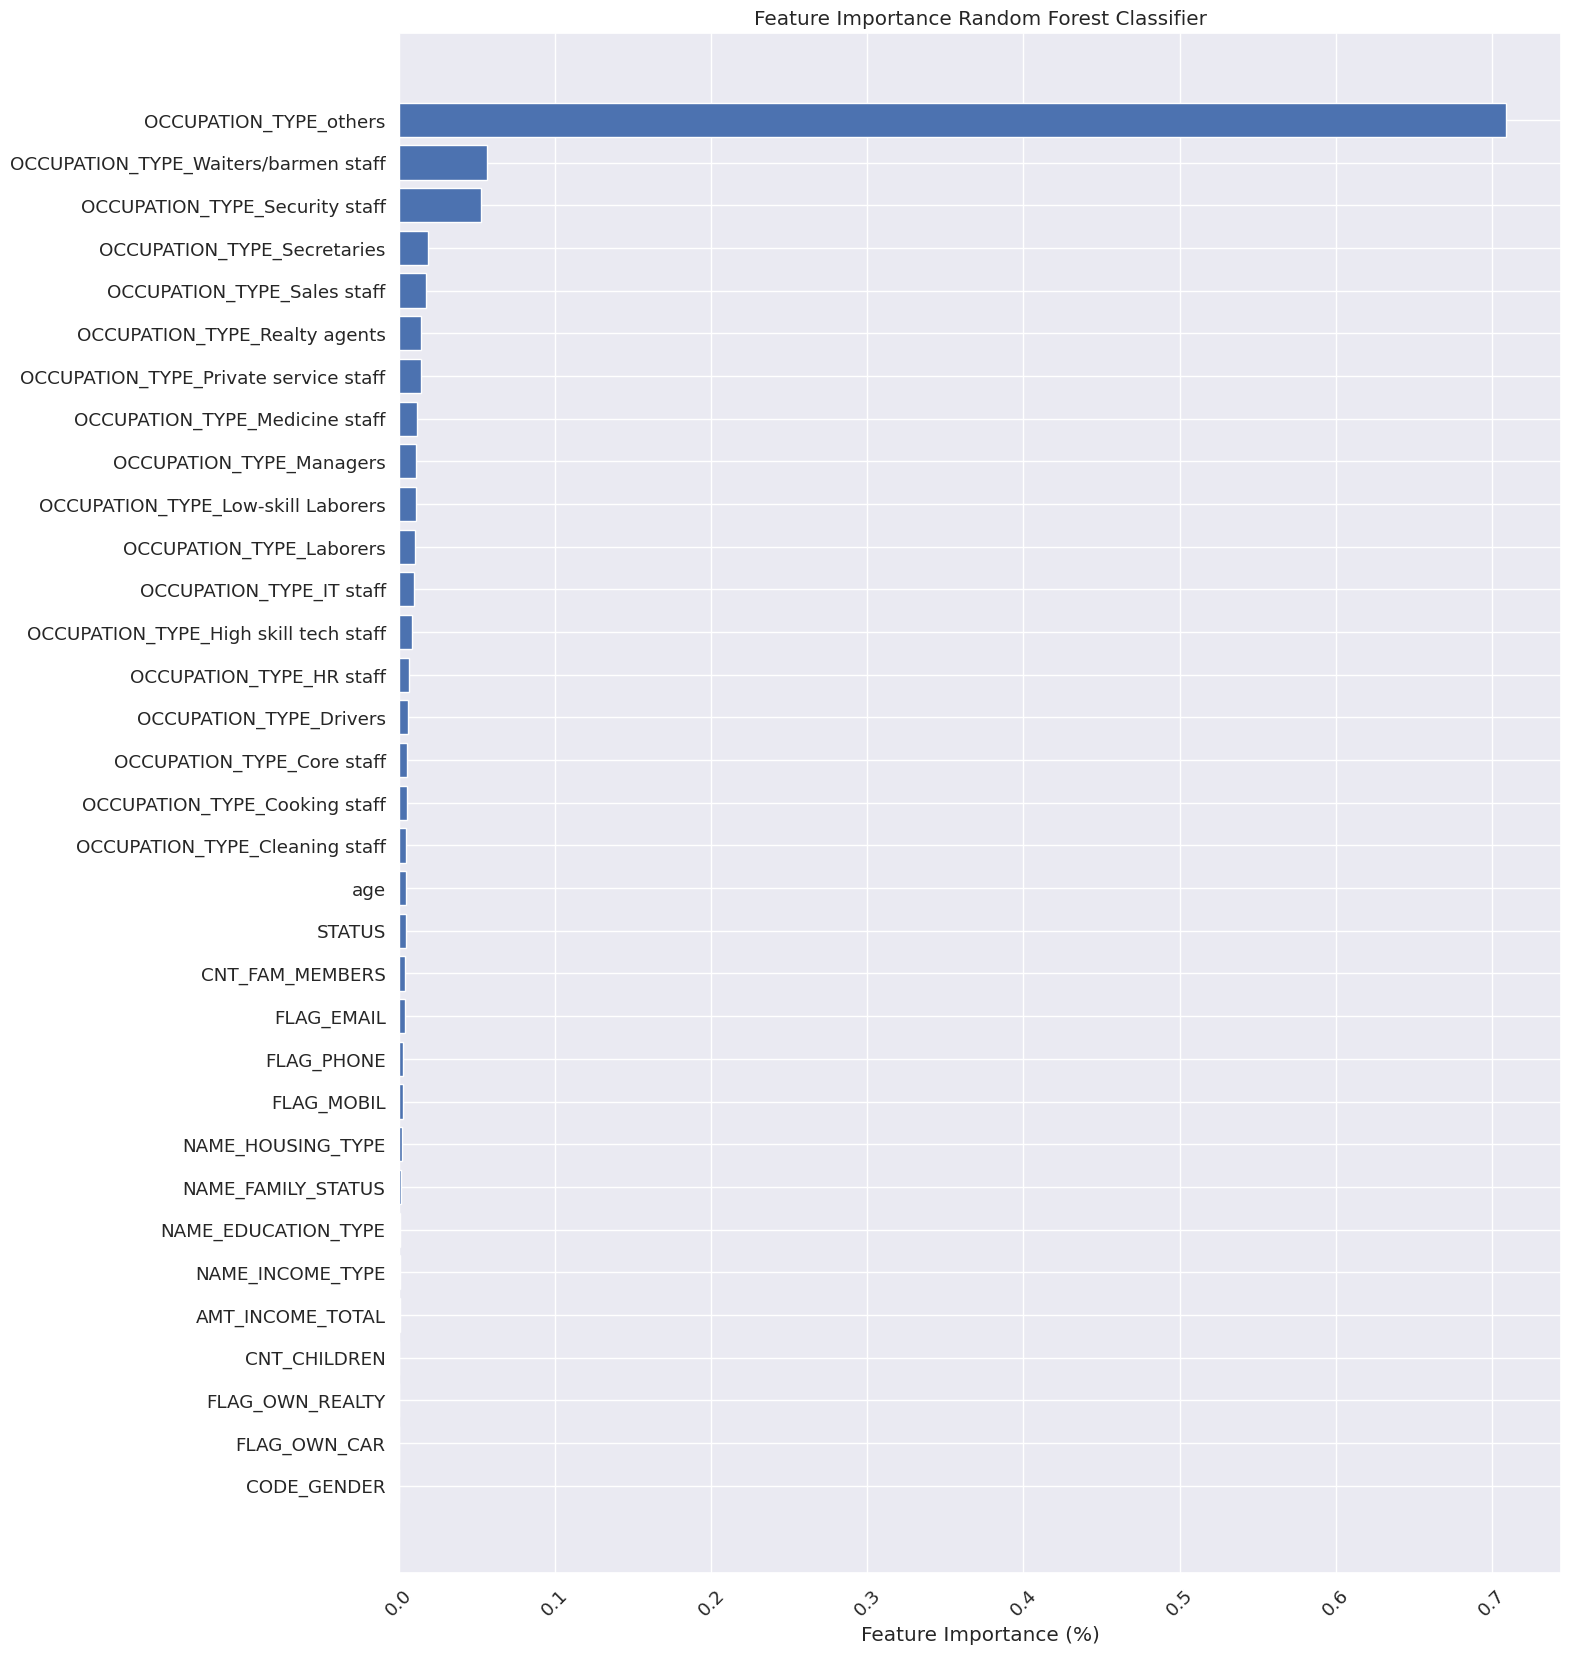

In [270]:
plot_feature_importance_2(x,rf_best,' Random Forest Classifier')

In [271]:
rf_df = pd.DataFrame({"actual":y_test,"predicted":y_pred_rf})
rf_df.head(5)

actual  predicted
3948       1          1
5097       1          1
3689       1          1
1499       0          0
5217       1          1

## 6-5. Random forest Clssifier + kfold

In [272]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [273]:
def randomforest_optuna_kfold (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    params = {

        'criterion'        : trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_depth'        : trial.suggest_int('max_depth', 1, 30000),
        'max_features'     : trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
        'max_leaf_nodes'   : trial.suggest_int('max_leaf_nodes', 1, 30000),
        'n_estimators'     : trial.suggest_int('n_estimators', 30, 1000),
    }
    kf = KFold(n_splits=7, random_state=42, shuffle=True)
    #creat model anf pass parameters
    model = RandomForestClassifier(**params)
    model.fit(x_train, y_train)
    predection = model.predict(x_test)
    acc = accuracy_score(y_test, predection, )
    return acc


In [274]:
study = optuna.create_study(direction="minimize")
#start serach
study.optimize(randomforest_optuna_kfold, n_trials=200)

[I 2023-06-19 05:10:48,760] A new study created in memory with name: no-name-518ceddf-7101-4351-99be-bc1d7c3dcc1e
[I 2023-06-19 05:10:49,241] Trial 0 finished with value: 0.9994107248084856 and parameters: {'criterion': 'gini', 'max_depth': 23871, 'max_features': 'log2', 'max_leaf_nodes': 11150, 'n_estimators': 113}. Best is trial 0 with value: 0.9994107248084856.
[I 2023-06-19 05:10:52,246] Trial 1 finished with value: 1.0 and parameters: {'criterion': 'entropy', 'max_depth': 4618, 'max_features': 'sqrt', 'max_leaf_nodes': 7305, 'n_estimators': 671}. Best is trial 0 with value: 0.9994107248084856.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2023-06-19 05:10:54,253] Trial 2 finished

In [275]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 0.9982321744254566
  Params: 
    criterion: gini
    max_depth: 25625
    max_features: sqrt
    max_leaf_nodes: 24706
    n_estimators: 30


In [276]:
rf_best_kfold = RandomForestClassifier(bootstrap= False,max_depth=2109,criterion='entropy',max_features='log2',max_leaf_nodes= 16787,n_estimators= 32)
rf_best_kfold.fit(x_train,y_train)
y_pred_rf_kfold      = rf_best_kfold.predict(x_test)
y_pred_train_rf_kfold   = rf_best_kfold.predict(x_train)


In [277]:
print("Percition   using RF with KF on test Data  : {:.2f} %".format(np.round(precision_score(y_test, y_pred_rf_kfold),4)*100))
print("Recall      using RF with KF on test Data   : {:.2f} %".format(np.round(recall_score(y_test, y_pred_rf_kfold),4)*100))
print("Accurcy     using RF with KF on test Data   : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_rf_kfold),4)*100))

Percition   using RF with KF on test Data  : 100.00 %
Recall      using RF with KF on test Data   : 100.00 %
Accurcy     using RF with KF on test Data   : 100.00 %


In [278]:
rf_best_kfold.feature_importances_

array([6.25108149e-03, 7.14482006e-03, 8.06094661e-03, 7.00089657e-03,
       3.85995794e-02, 1.39722394e-02, 9.27403594e-03, 1.28918775e-02,
       6.36526198e-03, 0.00000000e+00, 7.51084165e-03, 4.47256652e-03,
       1.04785196e-02, 7.89123664e-01, 3.96784256e-02, 3.82298635e-04,
       6.88558505e-04, 3.46212507e-03, 3.65911251e-03, 3.29279504e-04,
       2.02792024e-03, 9.54578960e-04, 3.88305346e-03, 2.66826758e-03,
       3.28089779e-03, 3.76309863e-03, 3.08370972e-04, 1.42489501e-04,
       2.58876189e-03, 5.02677846e-04, 5.41486060e-03, 2.80043984e-04,
       4.83884816e-03])

In [279]:
def plot_feature_importance_2 (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.feature_importances_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()

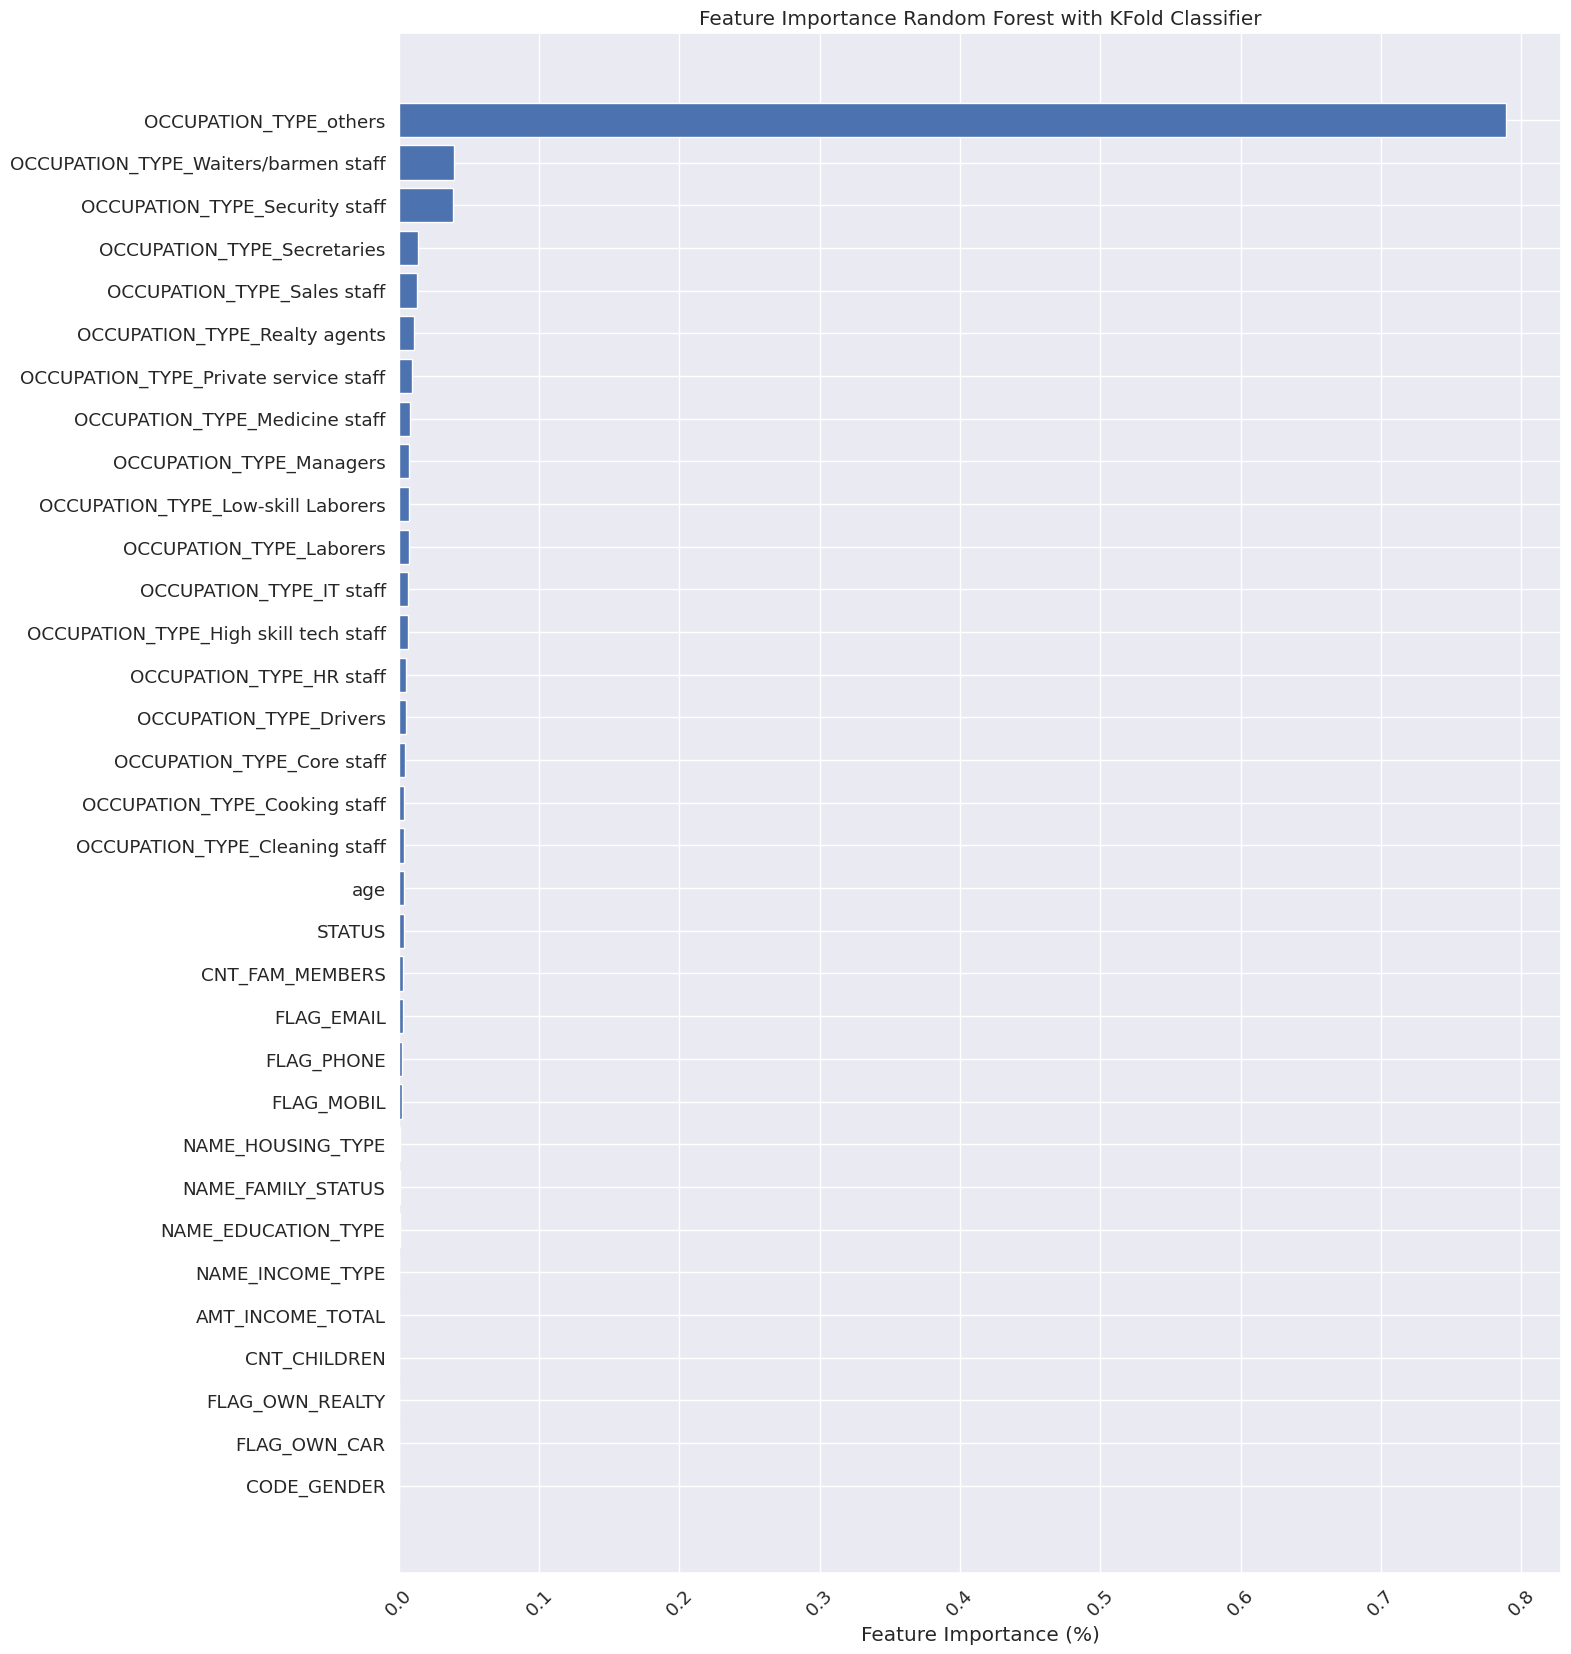

In [280]:
plot_feature_importance_2(x,rf_best_kfold,' Random Forest with KFold Classifier')

In [281]:
rf_kf_df = pd.DataFrame({"actual":y_test,"predicted":y_pred_rf_kfold})
rf_kf_df.head(5)

actual  predicted
3948       1          1
5097       1          1
3689       1          1
1499       0          0
5217       1          1

## 6-6. XGboost+Kfold

In [282]:
import xgboost as xgb

In [283]:
def xgboost_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define matrix for xfb
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dvalid = xgb.DMatrix(x_test, label=y_test)
    #define parameters
    params = {
    'objective'        : 'reg:squarederror',
    'min_child_weight' : trial.suggest_int('min_child_weight', 1, 100),
    'lambda'           : trial.suggest_loguniform('lambda', 1e-3, 5.0),
    'alpha'            : trial.suggest_loguniform('alpha', 1e-3, 5.0),
    'max_depth'        : trial.suggest_categorical('max_depth', [3,4,5,6,7]),
    'subsample'        : trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
    'learning_rate'    : trial.suggest_categorical('learning_rate', [0.001,0.01,0.05,0.1,0.2,0.25,0.3]),
    'n_estimators'     : trial.suggest_categorical('n_estimators', [300,400,500,1000,1500,2000,2500,3000]),
    'colsample_bytree' : trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
    }

    kf = KFold(n_splits=7, random_state=42, shuffle=True)
    for idx in list(kf.split(x_train,y_train)):
        #creat model anf pass parameters
        model = xgb.XGBClassifier(**params)
        model.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=100, verbose=False)
        predection = model.predict(x_test)
        acc = accuracy_score(y_test, predection)
    return acc

In [ ]:
study = optuna.create_study(direction="minimize")
#start serach
study.optimize(xgboost_optuna, n_trials=200)

In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

In [285]:
xgb_best = xgb.XGBClassifier(reg_lambda = 0.5667025244762842,
                   alpha = 0.0016428787046581727,
                   colsample_bytree = 0.9,
                   subsample = 0.4,
                   learning_rate = 0.05,
                   n_estimators = 2000,
                   max_depth = 7,
                   min_child_weight = 1)

In [286]:
xgb_best.fit(x_train, y_train)

XGBClassifier(alpha=0.0016428787046581727, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [287]:
y_pred_xg         = xgb_best.predict(x_test)
y_pred_train_xg   = xgb_best.predict(x_train)

In [288]:
print("Percition   using RF with XGBoost on test Data  : {:.2f} %".format(np.round(precision_score(y_test, y_pred_xg),4)*100))
print("Recall      using RF with XGBoost on test Data   : {:.2f} %".format(np.round(recall_score(y_test, y_pred_xg),4)*100))
print("Accurcy     using RF with XGBoost on test Data   : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_xg),4)*100))

Percition   using RF with XGBoost on test Data  : 100.00 %
Recall      using RF with XGBoost on test Data   : 100.00 %
Accurcy     using RF with XGBoost on test Data   : 100.00 %


In [289]:
xgb_best.feature_importances_

array([0.00686539, 0.00640942, 0.00575501, 0.00639627, 0.00598635,
       0.00320779, 0.00569111, 0.03692382, 0.03827167, 0.        ,
       0.01217789, 0.02389489, 0.02801776, 0.19293196, 0.00529894,
       0.        , 0.08030923, 0.02269903, 0.02513335, 0.        ,
       0.04193971, 0.06505719, 0.084848  , 0.08661225, 0.0340427 ,
       0.07104342, 0.        , 0.        , 0.02106113, 0.        ,
       0.08070444, 0.        , 0.00872121], dtype=float32)

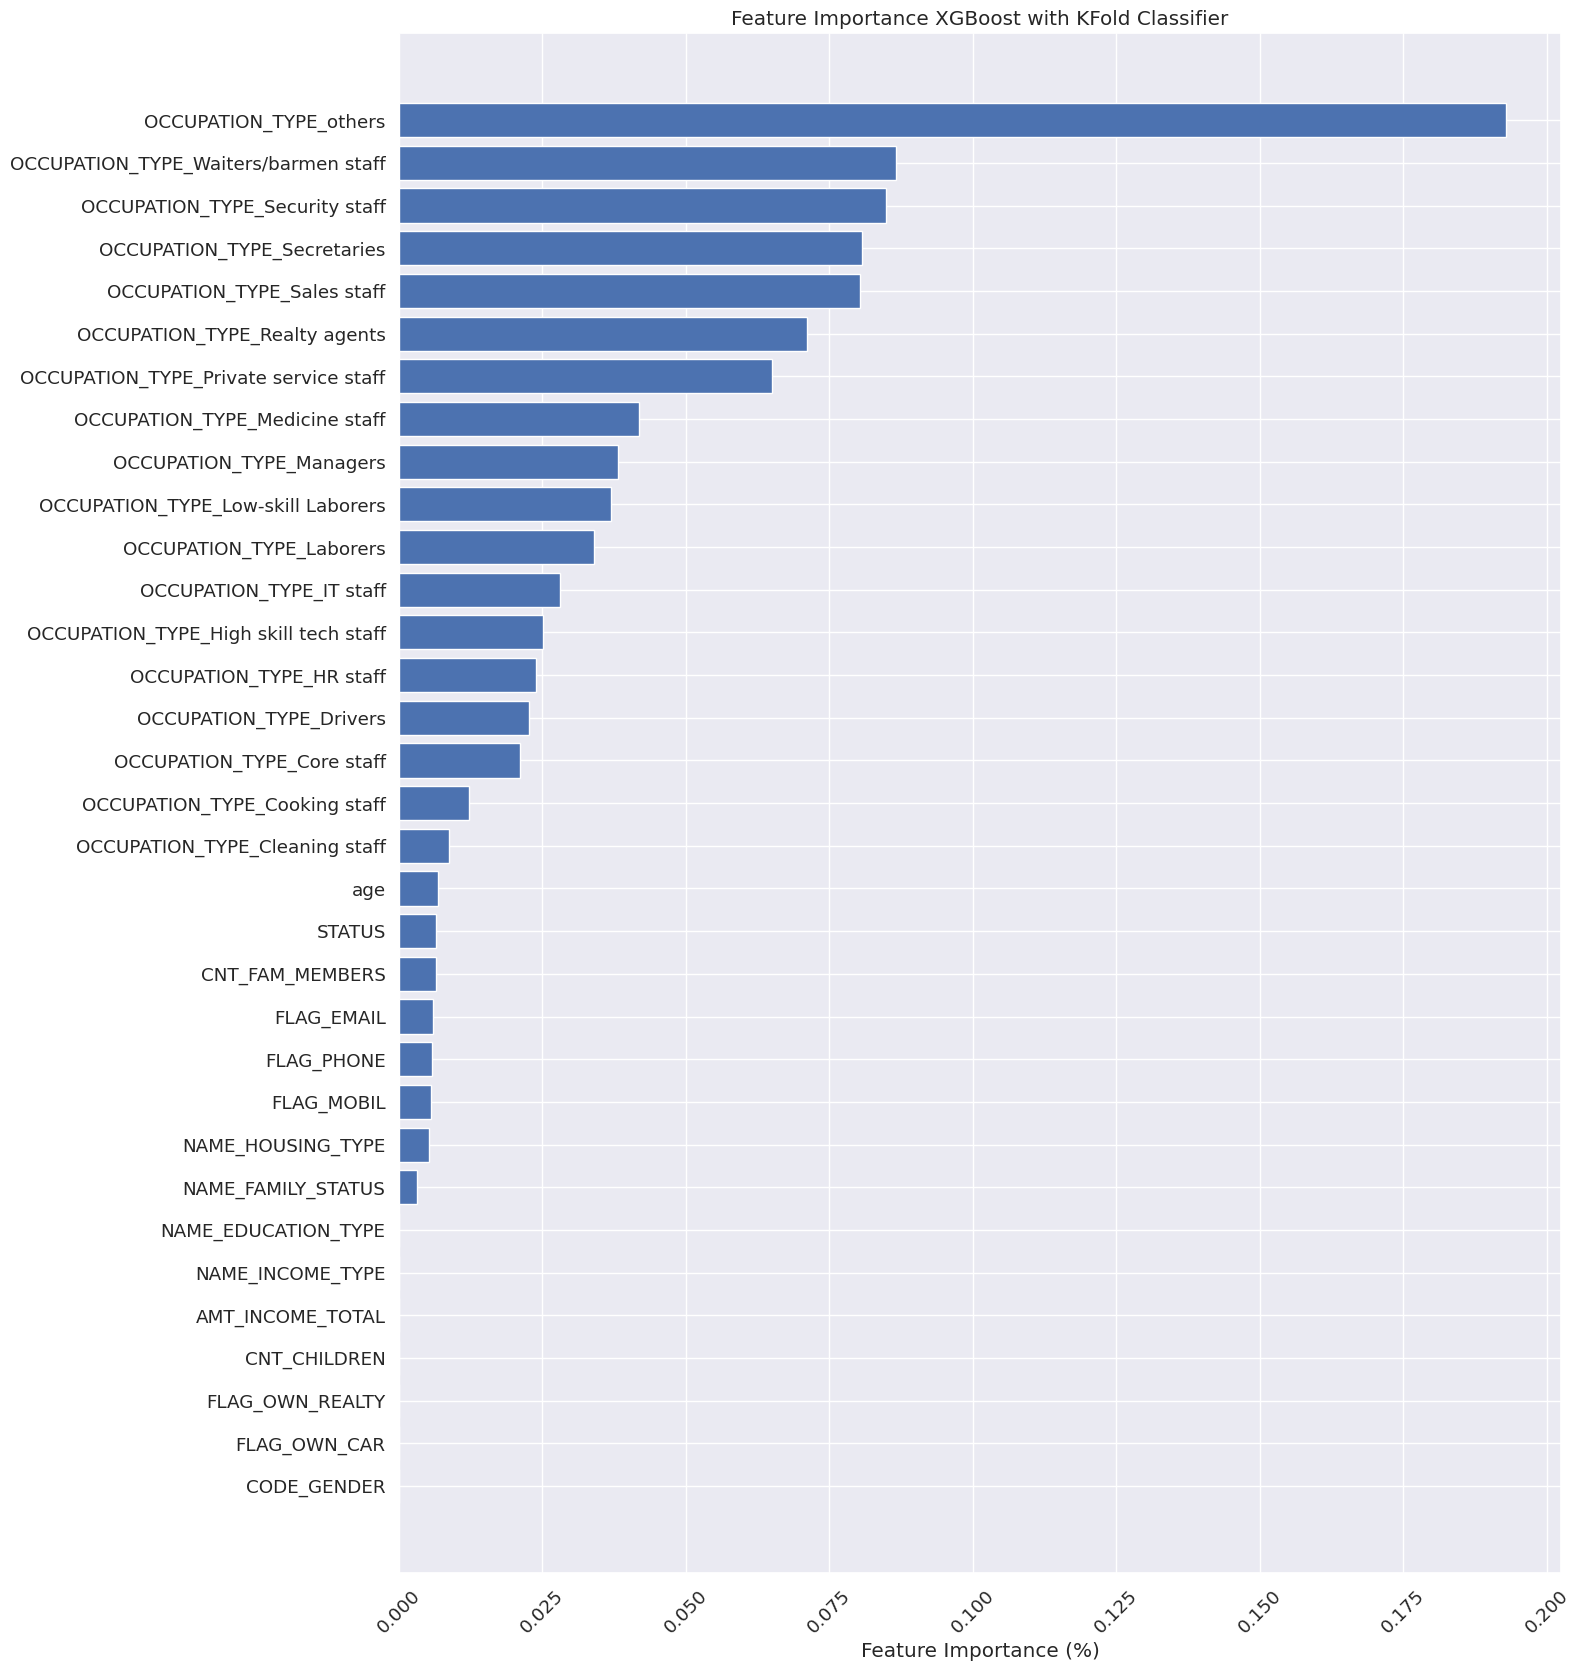

In [290]:
plot_feature_importance_2(x,xgb_best,' XGBoost with KFold Classifier')

In [291]:
xgb_kf_df = pd.DataFrame({"actual":y_test,"predicted":y_pred_xg })
xgb_kf_df.head(5)

actual  predicted
3948       1          1
5097       1          1
3689       1          1
1499       0          0
5217       1          1